In [12]:
# /*
#  AUTHOR: Vamsi Krishna Muppala 
#          Edwin Sahil Samuel Kathi
#          Alekhya Koppaka
#          Jayakumar Kukkathotti
#          Yaswanth Kumar Chaganti         
#  FILENAME: Musketeers_mainCode.py
#  SPECIFICATION:  Analyzing the dataset, building and evaluating a Reinofrcement Learning Techniques in neural network model using Python.
#  FOR: CS 5392 Reinforcement Learning  Section 001
# */

In [13]:
# Installing tensorflow of version 2.7
!pip install tensorflow==2.7

In [14]:
#################################################### Data Pre-Preprocessing ##################################################

In [15]:
# /*importing pandas to read csv file */
import pandas as pd # Import the pandas library and assign it the alias "pd"
print(pd.__version__) # Print the version of pandas installed in the environment

1.4.4


In [16]:
import csv #The import statement allows you to import external modules or libraries into your Python code. In this case, we are importing the csv module, which is part of Python's standard library and provides functionality for reading and writing CSV (Comma Separated Values) files.

In [17]:
# Importing the dataset 
df_fake = pd.read_csv("Fake.csv")  #reading fake.csv
df_true = pd.read_csv("True.csv")  #reading true.csv

In [18]:
# Labling the dataset: a label that marks the article as potentially unreliable
# False: unreliable
# True: reliable 
df_fake["label"] = False
df_true["label"] = True

In [19]:
# Concatinating both the dataset and creating a dataframe
df1 = pd.concat([df_fake,df_true])
df1 = df1.sample(frac=1).reset_index(drop=True)

In [20]:
df1.head(5) #Return the first 5 rows

,title,text,subject,date,label
0,"BREAKING: GA, KY, WV Confirm They Suspect Obam...",Georgia s secretary of state has claimed the D...,politics,"Dec 18, 2016",False
1,Obama Shows Why Trump Is Too Much Of A Hothea...,Donald Trump has constantly involved himself i...,News,"September 5, 2016",False
2,U.S. Senate hearings delayed for three wealthy...,WASHINGTON (Reuters) - The U.S. Senate has pos...,politicsNews,"January 11, 2017",True
3,WATCH: Sean Spicer Loses His Sh*t When Report...,Donald Trump s White House mouthpiece just gav...,News,"March 22, 2017",False
4,Russia urges U.S. to start finding way to reso...,MOSCOW (Reuters) - Russian Deputy Foreign Mini...,worldnews,"September 11, 2017",True


Fake News Subject :  {'News': 9050, 'politics': 6841, 'left-news': 4459, 'Government News': 1570, 'US_News': 783, 'Middle-east': 778}
True News Subject :  {'politicsNews': 11272, 'worldnews': 10145}


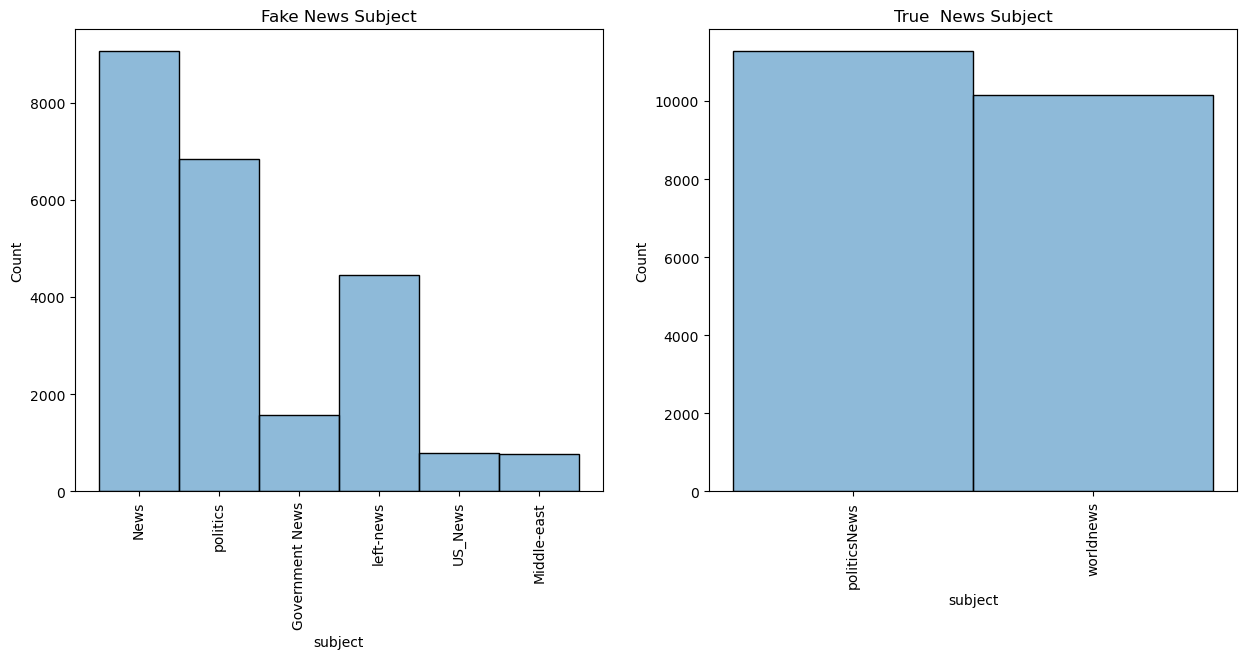

In [21]:
# libraries to create two histograms of the subjects of fake and true news articles.
import matplotlib.pyplot as plt
import seaborn as sns
#Creating Figure
fig, axes = plt.subplots(1,2, figsize = (15,6)) #line creates a figure with two subplots side by side, each with a size of 15 by 6 inches.
#Adding the histogram1 - Fake News
sns.histplot(df_fake.subject, palette = 'Set1', alpha = 0.5, ax = axes[0]) #creates a histogram of the subjects of fake news articles using the histplot function from seaborn. The palette parameter sets the color scheme, alpha sets the opacity, and ax specifies which subplot to add the histogram to. The same parameters are used for the histogram of true news articles in the next line.
axes[0].tick_params(axis = 'x', rotation = 90) # rotates the x-axis tick labels of the first histogram by 90 degrees for better readability.
axes[0].set_title('Fake News Subject') # adds a title to the first histogram.
#Adding the histogram2 - True News
sns.histplot(df_true.subject, palette = 'Set1', alpha = 0.5, ax = axes[1]) #creates a histogram of the subjects of true news articles using the histplot function from seaborn. The palette parameter sets the color scheme, alpha sets the opacity, and ax specifies which subplot to add the histogram to. The same parameters are used for the histogram of true news articles in the next line.
axes[1].tick_params(axis = 'x', rotation = 90) # rotates the x-axis tick labels of the first histogram by 90 degrees for better readability.
axes[1].set_title('True  News Subject')  # adds a title to the first histogram.
#Printing the count of Subject
print("Fake News Subject : ",dict(df_fake.subject.value_counts())) #prints a dictionary of the count of each subject in the fake news articles dataframe. The value_counts() method counts the number of occurrences of each unique value in the subject column and returns them as a pandas Series object. The dict() function is used to convert this Series object to a dictionary.
print("True News Subject : ",dict(df_true.subject.value_counts())) #prints a dictionary of the count of each subject in the fake news articles dataframe. The value_counts() method counts the number of occurrences of each unique value in the subject column and returns them as a pandas Series object. The dict() function is used to convert this Series object to a dictionary.

0    23481
1    21417
Name: label, dtype: int64


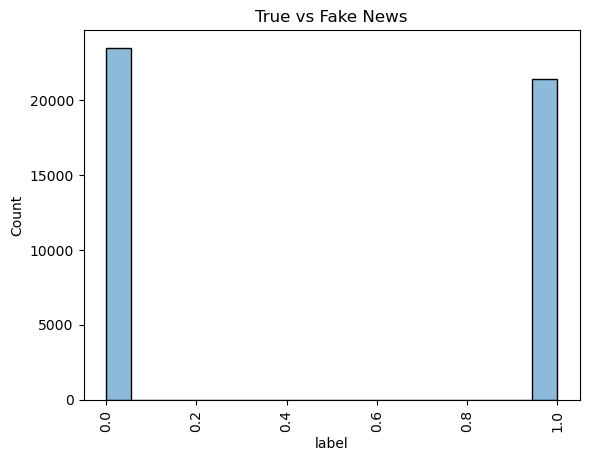

In [22]:
# Convert boolean values in the 'label' column to binary values (0 or 1)
df1['label'] = df1['label'].astype(int)

# Create a histogram using sns.histplot
sns.histplot(df1['label'], palette='Set1', alpha=0.5)# Create a histogram using sns.histplot
plt.tick_params(axis='x', rotation=90)# Rotate the x-axis tick labels by 90 degrees for better readability
plt.title('True vs Fake News')# Add a title to the histogram

# Print the count of each unique value in the 'label' column
print(df1['label'].value_counts())# Print the count of each unique value in the 'label' column

In [23]:
df1=df1.dropna() #removes the rows that contains NULL values

In [24]:
selected_columns = df1[['title', 'label']] ## Select the 'title' and 'label' columns from the DataFrame 'df1' and store them in the 'selected_columns' variable

In [25]:
df = pd.DataFrame(selected_columns) # Create a new DataFrame 'df' from the 'selected_columns' data

In [26]:
df.head(5) #Return the first 5 rows

,title,label
0,"BREAKING: GA, KY, WV Confirm They Suspect Obam...",0
1,Obama Shows Why Trump Is Too Much Of A Hothea...,0
2,U.S. Senate hearings delayed for three wealthy...,1
3,WATCH: Sean Spicer Loses His Sh*t When Report...,0
4,Russia urges U.S. to start finding way to reso...,1


In [27]:
import sklearn #scikit-learn, also known as sklearn, is a popular open-source machine learning library for Python. It provides a wide range of tools for machine learning, including classification, regression, clustering, and dimensionality reduction, among others.
print(sklearn.__version__) #version of the sklearn

1.0.2


In [28]:
import numpy as np #Import the NumPy library
np.__version__ #version of numpy

'1.23.5'

In [29]:
################################################ Data Splitting and Vectorization ############################################

In [30]:
#he TfidfTransformer and TfidfVectorizer classes are imported from the sklearn.feature_extraction.text module. These classes are used for text feature extraction using the term frequency-inverse document frequency (TF-IDF) method

from sklearn.feature_extraction.text import TfidfTransformer # Import the TfidfTransformer class from the sklearn.feature_extraction.text module
from sklearn.feature_extraction.text import TfidfVectorizer # Import the TfidfVectorizer class from the sklearn.feature_extraction.text module

In [31]:
#TensorFlow is a popular open-source deep learning framework developed by Google, and it provides a wide range of tools and functionalities for building and training neural networks.
#NumPy is a powerful numerical computing library for Python that provides support for arrays, matrices, and other mathematical operations. It is often used in conjunction with TensorFlow for handling numerical data in machine learning and deep learning applications.
import tensorflow as tf #Import the TensorFlow library
import numpy as np #Import the NumPy library

In [32]:
#The train_test_split function is part of the sklearn.model_selection module, which provides various functions for data splitting, cross-validation, and model evaluation in scikit-learn (sklearn), which is a popular machine learning library in Python.
from sklearn.model_selection import train_test_split ## Import the train_test_split function from the sklearn.model_selection module

#This code uses the train_test_split function from scikit-learn (sklearn) to split the data into training and testing sets.
#df['title']: This specifies the input data (features) for training and testing, which is the 'title' column of the DataFrame df.
#df['label']: This specifies the target labels for training and testing, which is the 'label' column of the DataFrame df.
#test_size=0.2: This specifies the proportion of data to be used for testing, which is set to 20% of the total data. The remaining 80% will be used for training.
#random_state=42: This sets the random seed for reproducibility. By setting it to a specific value (e.g., 42), the same split will be obtained every time the code is run, which is useful for reproducible research or model development.

X_train, X_test, y_train, y_test = train_test_split(df['title'], df['label'], test_size=0.2, random_state=42) 
print(y_train) #print the y_train

36335    0
12384    1
24419    0
24740    1
27039    0
        ..
11284    0
44732    0
38158    1
860      0
15795    0
Name: label, Length: 35918, dtype: int32


In [33]:
# Create TF-IDF vectorizer
#This code initializes a TfidfVectorizer object from scikit-learn (sklearn) with specified parameters:
#stop_words='english': This specifies that common English words (e.g., "a", "an", "the", etc.) should be ignored as stop words during text vectorization. Stop words are common words that do not carry much meaning and are typically removed to reduce noise and improve model performance.
#max_df=0.7: This specifies the maximum document frequency (proportion of documents) for a term to be included in the vectorized output. In this case, any term that appears in more than 70% of the documents will be ignored. This is used to filter out very common terms that may not be informative for distinguishing between documents.

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [34]:
X_train_vectors = vectorizer.fit_transform(X_train) #vectorizer.fit_transform(X_train): This line fits the vectorizer to the training data (X_train) and transforms it into TF-IDF vectors. The resulting X_train_vectors variable will contain the TF-IDF vectors representing the training data.
X_test_vectors = vectorizer.transform(X_test) #vectorizer.transform(X_test): This line transforms the test data (X_test) into TF-IDF vectors using the vectorizer object that was fit to the training data. The resulting X_test_vectors variable will contain the TF-IDF vectors representing the test data. 

In [35]:
from tensorflow.keras.layers import Input, Dense, LSTM #These lines import the Input, Dense, and LSTM classes from the layers module in Keras. These are commonly used layers in building neural networks.
from tensorflow.keras.models import Model # This line imports the Model class from the models module in Keras. The Model class is used to define the architecture of a neural network model in Keras, specifying the input and output layers, as well as any intermediate layers.

In [36]:
## Install the keras-rectified-adam package for optimized Adam optimizer
!pip install keras-rectified-adam

In [37]:
# Import the Adam optimizer from TensorFlow's Keras API
from tensorflow.keras.optimizers import Adam

In [38]:
#################################################### NN Model #################################################################

In [39]:
################################################## NN_Q-Learning ###############################################################

In [40]:
# imports the necessary libraries to implement a neural network using the TensorFlow library for machine learning
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [41]:
# Define Q-LEARNING Technique for NN model
# NAME: q_learning
# PURPOSE: to implement the Q-learning technique for training a neural network model (model) using given input data (x) and target labels (y) with a specified optimizer (optimizer). The algorithm is trained for a given number of epochs (epochs) and batch size (batch_size), and uses a discount factor (gamma) for computing the Q-values and rewards. The Q-values and rewards are used to modify the loss function and update the model's weights. The code also includes the visualization of reward and loss histograms for analysis. 
#          The purpose of this code is to define the Q-learning function for a neural network model, which can be used for reinforcement learning tasks.
# INVARIANTS: The input data x should be a sparse matrix, and length is calculated using the getnnz() method of x.
#             The input data y should be a numpy array of target labels for each sample in x.
#             The model should be a neural network model implemented using TensorFlow.
#             The optimizer should be an instance of a TensorFlow optimizer (e.g. Adam optimizer).
#             Epochs should be an integer specifying the number of times to iterate over the input data.
#             batch_size should be an integer specifying the size of each batch during training.
#             gamma should be a float specifying the discount factor for future rewards in the Q-learning algorithm.
#             The training process involves iterating over the input data in batches of size batch_size, and for each batch:
#             The logits (raw output) of the model for the input data x_batch are computed using model(x_batch).
#             The log probabilities of the logits are computed using tf.math.log(tf.clip_by_value(logits, 1e-10, 1.0)).
#             One-hot encoded labels are created from the target labels y_batch using tf.one_hot() method.
#             The maximum Q-value for each sample in the batch is computed using tf.reduce_max(logits, axis=1).
#             The maximum Q-value is used as the reward and is converted to a numpy array using q_values.numpy().
#             The policy gradient loss is computed by multiplying the log probabilities with the one-hot encoded labels and taking the negative mean using tf.reduce_mean(tf.reduce_sum(labels * log_probs, axis=1) * rewards).
#             The gradients of the policy gradient loss with respect to the model's trainable weights are computed using tape.gradient().
#             The gradients are applied to the optimizer using optimizer.apply_gradients() to update the model's weights.
#             The average reward for the current batch is computed and used as a baseline.
#             The model loss is computed by multiplying the policy gradient loss with the average reward and the discount factor (gamma).
#             The gradients of the model loss with respect to the model's trainable weights are computed using tape.gradient().
#             The gradients are applied to the optimizer using optimizer.apply_gradients() to update the model's weights.
#             The rewards and losses for each epoch are stored in epoch_rewards and epoch_losses, respectively.
#             After training, the reward and loss histograms for all epochs are plotted using plt.hist().


# Define the Q-learning function
def q_learning(x, y, model, optimizer, epochs, batch_size, gamma): #class to define the Q-Learning technique
    length = x.getnnz() #Calculates the length of the input data (x) using getnnz() method.
    for epoch in range(epochs): #Iterates over each epoch.
        epoch_rewards = [] #empty lists that are likely intended to store the rewards for each epoch during the training of a neural network.
        epoch_losses = [] #empty lists that are likely intended to store the losses for each epoch during the training of a neural network.
        for batch_start in range(0, length, batch_size): #It is used to iterate over the input data (x) in batches of size batch_size during the training process. It starts from the beginning of the input data and increments in steps of batch_size until it reaches the end of the data. 
            batch_end = min(batch_start + batch_size, length) # # It calculates the ending index (batch_end) of the current batch during the iteration over the input data (x) in batches. It ensures that the ending index does not exceed the total length of the data (length) to avoid accessing data beyond the available range. 
            x_batch = x[batch_start:batch_end].toarray() #Extracting a batch of data from the array 'x' using the start and end indices of the batch.toarray() converters the batch to an array, if it's in sparse format, for further processing
            y_batch = y[batch_start:batch_end] #Extracting a batch of labels from the array 'y' using the start and end indices of the batch
            with tf.GradientTape() as tape: #tf.GradientTape() is a TensorFlow API that provides a mechanism for automatic differentiation, which is a key technique used in machine learning optimization algorithms, such as gradient descent. It allows you to compute gradients of a computation with respect to its input variables, which can then be used to update the values of those variables during optimization."tape" refers to a mechanism provided by TensorFlow that records operations for the purpose of computing gradients. The tape acts as a context within which computations are recorded, and these computations can later be used to compute gradients using the tape.gradient() method.
                logits = model(x_batch) #Passing the batch of input data 'x_batch' through the model to obtain logits.Logits are the output of the model before applying any activation function, typically used for classification tasks Logits represent the raw, unnormalized scores for each class, which can be used for further processing or prediction.'model' is the trained model that takes 'x_batch' as input and produces logits as output
                log_probs = tf.math.log(tf.clip_by_value(logits, 1e-10, 1.0)) # calculates the log probabilities by taking the natural logarithm (tf.math.log()) of the model's predicted logits (logits). The tf.clip_by_value() function is used to clip the logits to a specific range to avoid numerical instability. In this case, the minimum value is set to 1e-10 and the maximum value is set to 1.0. The resulting log probabilities are stored in the log_probs variable.
                labels = tf.one_hot(y_batch, depth=output_dim) #Converting the batch of labels 'y_batch' into one-hot encoding using 'tf.one_hot' function One-hot encoding represents categorical labels as binary vectors with a single '1' and remaining '0's.'y_batch' is the input tensor containing the batch of labels to be converted to one-hot encoding.'output_dim' specifies the depth of the one-hot encoding, which should be equal to the number of classes in the classification task
                q_values = tf.reduce_max(logits, axis=1) # Compute the maximum Q-value for each sample in the batch
                rewards = q_values.numpy() # Use the maximum Q-value as the reward
                loss = -tf.reduce_mean(tf.reduce_sum(labels * log_probs, axis=1) * rewards) # Modify the loss function to include the reward
                grads = tape.gradient(loss, model.trainable_weights) # #grads typically refers to the computed gradients of the loss function with respect to the trainable weights of a machine learning model.The tape.gradient() function in TensorFlow is used to compute the gradients of a given function (in this case, the loss function) with respect to a list of variables (in this case, the model.trainable_weights). These gradients can then be used in an optimization algorithm, such as gradient descent, to update the model weights and improve the model's performance during training.Compute the gradients of the loss with respect to the trainable weights of the model.loss: The computed loss value.model.trainable_weights: List of trainable weights of the model
            optimizer.apply_gradients(zip(grads, model.trainable_weights)) #It applies the computed gradients (grads) to update the model weights (model.trainable_weights) using an optimizer. The zip() function is used to create pairs of gradients and corresponding model weights, which are then passed to the apply_gradients() method of the optimizer to perform the weight update step. This step is a key part of the optimization process in training machine learning models, as it helps to adjust the model weights based on the gradients of the loss function, with the goal of minimizing the loss and improving the model's performance.
            epoch_rewards.append(rewards) #appends the rewards obtained by the network during the current epoch to the epoch_rewards list. This allows us to keep track of the rewards obtained by the network during each epoch of training.
            epoch_losses.append(loss.numpy()) # appends the loss obtained by the network during the current epoch to the epoch_losses list. This allows us to keep track of the loss obtained by the network during each epoch of training.The numpy() method is used to extract the numerical value of the TensorFlow loss object, which is a symbolic representation of the loss function used to train the network. This numerical value is then appended to the epoch_losses list.
            print("The rewards are:", rewards) #prints the rewards
            
    # Plot reward histogram
    plt.hist(epoch_rewards, bins=20) #creates a histogram plot of the distribution of the rewards obtained by the network during training, using 20 bins. This allows us to visualize how often the network obtained rewards in different ranges, which can provide insight into its overall performance.
    plt.title("Reward Histogram Q-Learning NN") # sets the title of the plot to "Reward Histogram Q-Learning NN", which describes the type of algorithm used and the type of data being plotted.
    plt.xlabel("Reward") #sets the x-axis label to "Reward", which describes the meaning of the values being plotted on the x-axis.
    plt.ylabel("Frequency") #sets the y-axis label to "Frequency", which describes the number of occurrences of rewards in each bin.
    plt.show() #displays the plot on the screen. This allows us to see the distribution of the rewards obtained by the network during training and gain insights into its performance.
    
    # Plot loss histogram 
    plt.hist(epoch_losses, bins=20) # creates a histogram plot of the distribution of the losses obtained by the network during training, using 20 bins. This allows us to visualize how often the network had a certain level of loss during the training process, which can provide insights into how well the network is learning and improving over time.
    plt.title("Loss Histogram Q-Learning NN") #sets the title of the plot to "Loss Histogram Q-Learning NN", which describes the type of algorithm used and the type of data being plotted.
    plt.xlabel("Loss") # sets the x-axis label to "Loss", which describes the meaning of the values being plotted on the x-axis.
    plt.ylabel("Frequency") #sets the y-axis label to "Frequency", which describes the number of occurrences of losses in each bin.
    plt.show() # displays the plot on the screen. This allows us to see the distribution of the losses obtained by the network during training and gain insights into its performance.


In [42]:
#Parameters and Neural network model 
input_dim = X_train_vectors.shape[1] #sets the variable input_dim equal to the number of features in the training data.'X_train_vectors.shape[1]'' retrieves the number of columns (i.e., features) in the feature matrix X_train_vectors. This value represents the number of input dimensions or features for the classification model.
output_dim = len(np.unique(y_train)) #sets the variable output_dim equal to the number of unique target labels in the training data. These variables are likely used to define the input and output dimensions of the neural network or classification model being built.np.unique(y_train) returns the unique values of the target variable y_train. The length of this array is equal to the number of distinct target labels in the dataset.len(np.unique(y_train)) returns the number of unique target labels in the dataset. This value represents the number of output dimensions or classes for the classification model.



In [43]:
# Build the NN model and define the optimizer
# Name: Neural Network model
# Purpose: to define and create a neural network or classification model for a given dataset.
# Invariants: The Input function defines the input layer of the neural network with shape=(input_dim,), where input_dim is the number of features in the training data.        
#             Two Dense functions are used to define the hidden layers of the neural network. The first hidden layer has 64 neurons and relu activation function, while the second hidden layer has output_dim neurons and softmax activation function. The output_dim variable represents the number of unique target labels in the training data.
#             The Model function is used to create an instance of the neural network or classification model with inputs=inputs and outputs=x. The model takes the input layer and hidden layers as input and outputs the predicted target labels.
#             Finally, the Adam optimizer with a learning rate of 0.001 is set to update the weights of the neural network or classification model during training.

inputs = Input(shape=(input_dim,)) #defines an input layer for the neural network or classification model with the specified number of features or input dimensions.The Input function takes shape=(input_dim,) as an argument, where input_dim is an integer representing the number of features in the training data. The shape parameter is a tuple that specifies the input shape of the layer.This line of code is important as it initializes the neural network or classification model and sets the input shape for the subsequent layers.
x = Dense(32, activation='relu')(inputs) #defines a hidden layer in the neural network or classification model.The Dense function creates a fully connected layer with 64 neurons and relu activation function. The activation parameter specifies the activation function used to introduce non-linearity into the model.The (inputs) at the end of the line specifies that the input to this layer is the inputs layer that was previously defined.This line of code is important because it adds a layer of computation to the neural network or classification model, which helps it learn complex representations of the input data. The relu activation function is commonly used in deep learning models and helps in speeding up the training process by preventing vanishing gradients.
x = Dense(output_dim, activation='softmax')(x) #defines the output layer of the neural network or classification model.The Dense function creates a fully connected layer with output_dim neurons and softmax activation function. The output_dim parameter specifies the number of unique target labels in the training data. The softmax activation function converts the output of the layer into a probability distribution over the target labels, where the highest probability is assigned to the predicted target label.The (x) at the end of the line specifies that the input to this layer is the output of the previous hidden layer x.This line of code is important because it is the final layer of the neural network or classification model, which produces the predicted target labels. The softmax activation function is commonly used for multi-class classification problems and ensures that the predicted probabilities sum up to 1.0 over all target labels.
model = Model(inputs=inputs, outputs=x) #creates an instance of the neural network or classification model with the specified input and output layers.The Model function takes inputs=inputs and outputs=x as arguments. The inputs parameter specifies the input layer of the model, which was previously defined using the Input function. The outputs parameter specifies the output layer of the model, which was defined using the Dense function.This line of code is important because it connects the input and output layers to create a neural network or classification model. The model is an instance of the Model class from Keras, which provides high-level APIs for building and training deep learning models. The model can be trained using various optimization algorithms and loss functions to minimize the difference between the predicted and actual target labels.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) #creates an instance of the Adam optimization algorithm for the neural network or classification model.The optimizers.Adam function is a popular optimization algorithm used for training deep neural networks. The learning_rate parameter specifies the step size or the size of the update made to the model weights during each iteration of the optimization algorithm.This line of code is important because it initializes the optimizer used to update the weights of the neural network or classification model during training. The choice of optimizer can significantly affect the performance of the model, and Adam is a popular choice due to its fast convergence and adaptive learning rate.
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001) #RMSprop optimizer
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) # is an important line of code in the process of building a deep learning model using Keras. It compiles the model by specifying the loss function, optimizer, and metrics to be used during training.In particular, the loss parameter specifies the loss function that the model will use to evaluate its performance on the training data. In this case, the 'categorical_crossentropy' loss function is used, which is commonly used for multiclass classification problems.The optimizer parameter specifies the optimization algorithm that will be used to adjust the weights of the model during training in order to minimize the loss function. Here, the optimizer variable is passed in, which should be an instance of a pre-defined optimizer class from Keras, such as Adam or RMSprop.Finally, the metrics parameter specifies the evaluation metrics that will be used to monitor the model's performance during training and testing. In this case, 'accuracy' is the metric used, which is commonly used for classification problems.Overall, model.compile is a crucial step in the process of building and training a deep learning model, as it sets up the model for optimization by specifying the necessary components for the training process.
#model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy']) #loss:mean_squared_error



The rewards are: [0.50757366 0.5008864  0.50478524 0.50232923 0.50003326 0.50222594
 0.5024114  0.5036894  0.5030033  0.5007171  0.50080556 0.5008106
 0.5068415  0.5022695  0.5052227  0.5011695  0.5004357  0.50197315
 0.5065968  0.50275964 0.50292075 0.5028307  0.50211275 0.50335646
 0.5013122  0.500453   0.5014694  0.5076789  0.5027622  0.50241786
 0.5019941  0.5010095 ]
The rewards are: [0.5004183  0.5019492  0.5030706  0.5008941  0.50333697 0.5056214
 0.50700295 0.5025444  0.50102586 0.5015638  0.50434995 0.5043855
 0.50761247 0.5029135  0.50023377 0.50101745 0.50622797 0.5014354
 0.50430995 0.5011165  0.5046507  0.5003742  0.50090826 0.5001075
 0.5004104  0.50099856 0.50524396 0.504555   0.5019002  0.50393695
 0.50453466 0.5007765 ]
The rewards are: [0.5017036  0.5029486  0.5021894  0.5026613  0.50136197 0.5052838
 0.5008711  0.50553113 0.50241613 0.5039775  0.50020915 0.5055906
 0.50473255 0.5078867  0.50425667 0.50553924 0.5032769  0.5090717
 0.5079772  0.50537944 0.5010573  0.50

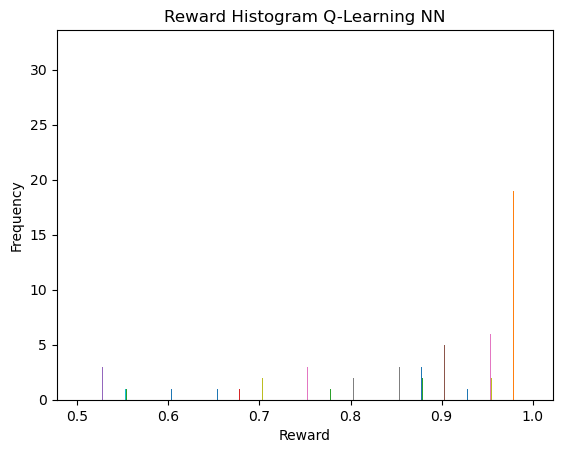

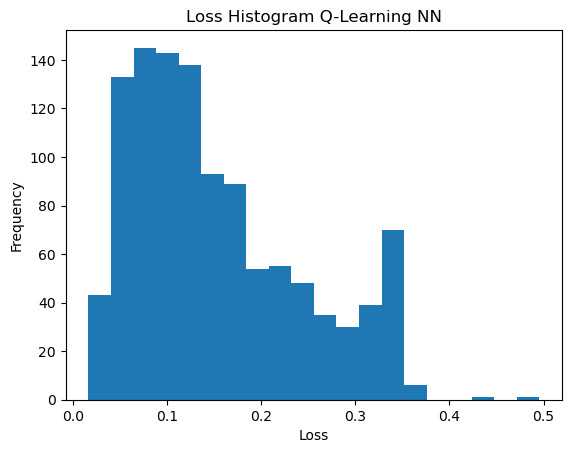

In [44]:
# Train model using Q-learning REINFORCEMENT LEARNING Technique
# NAME: Q_learning
# PARAMETERS:Call the Q_learning function with the following parameters:
#            X_train_vectors: Training input data (features)
#            y_train: Training target labels
#            model: The trained neural network model
#            Adam(learning_rate): Adam optimizer with specified learning rate
#            epochs: Number of training epochs
#            batch_size: Batch size for training
#            gamma: Discount factor for rewards
# PURPOSE: This is used to call the function named Q_learning with the provided arguments as input parameters.The purpose of this line of code is to invoke the Q_learning function and pass in the required input parameters for it to train the model with the reinforcement technique . 
# PRECONDITION: X_train_vectors, y_train, model, epochs, batch_size, gamma, and learning_rate should be appropriately defined and initialized before this function call.
# POSTCONDITION: The model's weights and biases being updated based on the policy gradient algorithm, the function is designed to update the model's parameters during training.

q_learning(X_train_vectors, y_train, model, optimizer, epochs=1, batch_size=32, gamma=0.95)

In [45]:
################################################## NN_Policy Gradient ##########################################################

In [46]:
# Define Policy Gradient REINFORCEMENT LEARNING Technique for NN model
# NAME: policy_gradient
# PURPOSE: To implement the policy gradient algorithm for training a neural network model (model) using given input data (x) and target labels (y) with a specified optimizer (optimizer). The algorithm is trained for a given number of epochs (epochs) and batch size (batch_size), and uses a discount factor (gamma) for computing the model loss.
#          The purpose of this code is to train a neural network model using the policy gradient algorithm, where the model's weights are updated based on the computed policy gradient and model loss, and the training process is performed in batches for efficiency.
# INVARIANTS: Calculates the length of the input data (x) using getnnz() method.
#             Iterates over each epoch.
#             For each epoch, iterates over the input data (x) in batches of size batch_size.
#             For each batch, computes the logits (raw output) of the model for the input data using model(x_batch).
#             Computes the log probabilities of the logits using tf.math.log(tf.clip_by_value(logits, 1e-10, 1.0)).
#             Creates one-hot encoded labels from the target labels (y_batch) using tf.one_hot() method.
#             Computes the policy gradient loss by multiplying the log probabilities with the one-hot encoded labels and taking the negative mean using tf.reduce_mean(tf.reduce_sum(labels * log_probs, axis=1)).
#             Computes the gradients of the policy gradient loss with respect to the model's trainable weights using tape.gradient().
#             Applies the gradients to the optimizer using optimizer.apply_gradients() to update the model's weights.
#             Computes the average reward for the current batch and uses it as a baseline.
#             Computes the model loss by multiplying the policy gradient loss with the average reward and the discount factor (gamma).
#             Computes the gradients of the model loss with respect to the model's trainable weights using tape.gradient().
#             Applies the gradients to the optimizer using optimizer.apply_gradients() to update the model's weights.
#             The purpose of this code is to train a neural network model using the policy gradient algorithm, where the model's weights are updated based on the computed policy gradient and model loss, and the training process is performed in batches for efficiency.

import matplotlib.pyplot as plt #install the libraries to get the histogram
import tensorflow as tf

def policy_gradient(x, y, model, optimizer, epochs, batch_size, gamma): #class to define the policy_gradient RL technique
    length = x.getnnz()  #Calculates the length of the input data (x) using getnnz() method.
    for epoch in range(epochs): #Iterates over each epoch.
        epoch_rewards = [] #empty lists that are likely intended to store the rewards for each epoch during the training of a neural network.
        epoch_losses = [] #empty lists that are likely intended to store the losses for each epoch during the training of a neural network.
        for batch_start in range(0, length, batch_size): #It is used to iterate over the input data (x) in batches of size batch_size during the training process. It starts from the beginning of the input data and increments in steps of batch_size until it reaches the end of the data.
            batch_end = min(batch_start + batch_size, length) # It calculates the ending index (batch_end) of the current batch during the iteration over the input data (x) in batches. It ensures that the ending index does not exceed the total length of the data (length) to avoid accessing data beyond the available range. 
            x_batch = x[batch_start:batch_end].toarray() # Extracting a batch of data from the array 'x' using the start and end indices of the batch.toarray() converters the batch to an array, if it's in sparse format, for further processing
            y_batch = y[batch_start:batch_end] #Extracting a batch of labels from the array 'y' using the start and end indices of the batch
            with tf.GradientTape() as tape: #tf.GradientTape() is a TensorFlow API that provides a mechanism for automatic differentiation, which is a key technique used in machine learning optimization algorithms, such as gradient descent. It allows you to compute gradients of a computation with respect to its input variables, which can then be used to update the values of those variables during optimization."tape" refers to a mechanism provided by TensorFlow that records operations for the purpose of computing gradients. The tape acts as a context within which computations are recorded, and these computations can later be used to compute gradients using the tape.gradient() method.
                logits = model(x_batch) #Passing the batch of input data 'x_batch' through the model to obtain logits.Logits are the output of the model before applying any activation function, typically used for classification tasks Logits represent the raw, unnormalized scores for each class, which can be used for further processing or prediction.'model' is the trained model that takes 'x_batch' as input and produces logits as output
                log_probs = tf.math.log(tf.clip_by_value(logits, 1e-10, 1.0)) # calculates the log probabilities by taking the natural logarithm (tf.math.log()) of the model's predicted logits (logits). The tf.clip_by_value() function is used to clip the logits to a specific range to avoid numerical instability. In this case, the minimum value is set to 1e-10 and the maximum value is set to 1.0. The resulting log probabilities are stored in the log_probs variable.
                labels = tf.one_hot(y_batch, depth=output_dim) #Converting the batch of labels 'y_batch' into one-hot encoding using 'tf.one_hot' function One-hot encoding represents categorical labels as binary vectors with a single '1' and remaining '0's.'y_batch' is the input tensor containing the batch of labels to be converted to one-hot encoding.'output_dim' specifies the depth of the one-hot encoding, which should be equal to the number of classes in the classification task
                loss = -tf.reduce_mean(tf.reduce_sum(labels * log_probs, axis=1)) #Compute the cross-entropy loss. labels: Ground truth labels. log_probs: Log probabilities predicted by the model
                grads = tape.gradient(loss, model.trainable_weights) #grads typically refers to the computed gradients of the loss function with respect to the trainable weights of a machine learning model.The tape.gradient() function in TensorFlow is used to compute the gradients of a given function (in this case, the loss function) with respect to a list of variables (in this case, the model.trainable_weights). These gradients can then be used in an optimization algorithm, such as gradient descent, to update the model weights and improve the model's performance during training.Compute the gradients of the loss with respect to the trainable weights of the model.loss: The computed loss value.model.trainable_weights: List of trainable weights of the model
            optimizer.apply_gradients(zip(grads, model.trainable_weights)) #It applies the computed gradients (grads) to update the model weights (model.trainable_weights) using an optimizer. The zip() function is used to create pairs of gradients and corresponding model weights, which are then passed to the apply_gradients() method of the optimizer to perform the weight update step. This step is a key part of the optimization process in training machine learning models, as it helps to adjust the model weights based on the gradients of the loss function, with the goal of minimizing the loss and improving the model's performance.
            
            avg_reward = np.mean((logits.numpy().argmax(axis=1) == y_batch).astype(int)) #calculates the average reward, which is computed as the mean accuracy of the model's predicted logits compared to the ground truth labels (y_batch). It mentions that logits represents the model's predicted logits, and y_batch represents the ground truth labels. The result of the comparison between the predicted logits and ground truth labels is cast to an integer array using astype(int), and then the mean is calculated using np.mean(). The calculated average reward is stored in the avg_reward variable.
            rewards = avg_reward #Rewards for the model
            print("The rewards are:",rewards) #prints the rewards
            epoch_rewards.append(rewards) #appends the rewards obtained by the network during the current epoch to the epoch_rewards list. This allows us to keep track of the rewards obtained by the network during each epoch of training.
            model_loss = loss * rewards * gamma # calculates the model loss, which is obtained by multiplying the original loss (loss) with the rewards for the current step (rewards) and the discount factor (gamma). The loss variable represents the original loss value, while rewards represents the rewards obtained for the current step, and gamma is the discount factor used in the computation. The resulting model loss is stored in the model_loss variable.
            print("The model loss is:",model_loss) #prints the model loss
            epoch_losses.append(model_loss.numpy()) # appends the loss obtained by the network during the current epoch to the epoch_losses list. This allows us to keep track of the loss obtained by the network during each epoch of training.The numpy() method is used to extract the numerical value of the TensorFlow loss object, which is a symbolic representation of the loss function used to train the network. This numerical value is then appended to the epoch_losses list.
            #Now we computing the gradient using rewards and model loss
            with tf.GradientTape() as tape: # #tf.GradientTape() is a TensorFlow API that provides a mechanism for automatic differentiation, which is a key technique used in machine learning optimization algorithms, such as gradient descent. It allows you to compute gradients of a computation with respect to its input variables, which can then be used to update the values of those variables during optimization."tape" refers to a mechanism provided by TensorFlow that records operations for the purpose of computing gradients. The tape acts as a context within which computations are recorded, and these computations can later be used to compute gradients using the tape.gradient() method.
                logits = model(x_batch) #Passing the batch of input data 'x_batch' through the model to obtain logits.Logits are the output of the model before applying any activation function, typically used for classification tasks Logits represent the raw, unnormalized scores for each class, which can be used for further processing or prediction.'model' is the trained model that takes 'x_batch' as input and produces logits as output
                log_probs = tf.math.log(tf.clip_by_value(logits, 1e-10, 1.0)) # calculates the log probabilities by taking the natural logarithm (tf.math.log()) of the model's predicted logits (logits). The tf.clip_by_value() function is used to clip the logits to a specific range to avoid numerical instability. In this case, the minimum value is set to 1e-10 and the maximum value is set to 1.0. The resulting log probabilities are stored in the log_probs variable.
                model_loss = tf.reduce_mean(tf.reduce_sum(labels * log_probs * model_loss, axis=1)) #calculates the model loss by taking the element-wise multiplication (*) of the ground truth labels (labels), the logarithm of the clipped logits representing the predicted probabilities (log_probs), and the model loss calculated as the product of the original loss, rewards, and gamma (model_loss). Then, the tf.reduce_sum() function is used to compute the sum along the appropriate axis, and the tf.reduce_mean() function is used to compute the mean of the resulting values. The final computed model loss is stored in the model_loss variable.
                grads = tape.gradient(model_loss, model.trainable_weights) #calculates the gradients of the computed model loss (model_loss) with respect to the trainable weights of the model (model.trainable_weights). The tape.gradient() function is used to compute these gradients, and the resulting gradients are stored in the grads variable.
            optimizer.apply_gradients(zip(grads, model.trainable_weights)) #It applies the computed gradients (grads) to update the model weights (model.trainable_weights) using an optimizer. The zip() function is used to create pairs of gradients and corresponding model weights, which are then passed to the apply_gradients() method of the optimizer to perform the weight update step. This step is a key part of the optimization process in training machine learning models, as it helps to adjust the model weights based on the gradients of the loss function, with the goal of minimizing the loss and improving the model's performance.
            
            
           
    # Plot reward histogram
    plt.hist(epoch_rewards, bins=20) #creates a histogram plot of the distribution of the rewards obtained by the network during training, using 20 bins. This allows us to visualize how often the network obtained rewards in different ranges, which can provide insight into its overall performance.
    plt.title("Reward Histogram Policy Gradient NN") #sets the title of the plot to "Reward Histogram Policy Gradient NN", which describes the type of algorithm used and the type of data being plotted.
    plt.xlabel("Reward") #sets the x-axis label to "Reward", which describes the meaning of the values being plotted on the x-axis.
    plt.ylabel("Frequency") #sets the y-axis label to "Frequency", which describes the number of occurrences of rewards in each bin.
    plt.show() #displays the plot on the screen. This allows us to see the distribution of the rewards obtained by the network during training and gain insights into its performance.
    
        
    # Plot loss histogram
    plt.hist(epoch_losses, bins=20) # creates a histogram plot of the distribution of the losses obtained by the network during training, using 20 bins. This allows us to visualize how often the network had a certain level of loss during the training process, which can provide insights into how well the network is learning and improving over time.
    plt.title("Loss Histogram Policy Gradient NN") # sets the title of the plot to "Loss Histogram Policy Gradient NN", which describes the type of algorithm used and the type of data being plotted.
    plt.xlabel("Loss") # sets the x-axis label to "Loss", which describes the meaning of the values being plotted on the x-axis.
    plt.ylabel("Frequency") #sets the y-axis label to "Frequency", which describes the number of occurrences of losses in each bin.
    plt.show() # displays the plot on the screen. This allows us to see the distribution of the losses obtained by the network during training and gain insights into its performance.



In [47]:
#Parameters and Neural network model 
learning_rate = 0.001
epochs=1
batch_size = 32
gamma = 0.99 

In [48]:
# Build the NN model and define the optimizer
# Name: Neural Network model
# Purpose: to define and create a neural network or classification model for a given dataset.
# Invariants: The Input function defines the input layer of the neural network with shape=(input_dim,), where input_dim is the number of features in the training data.        
#             Two Dense functions are used to define the hidden layers of the neural network. The first hidden layer has 64 neurons and relu activation function, while the second hidden layer has output_dim neurons and softmax activation function. The output_dim variable represents the number of unique target labels in the training data.
#             The Model function is used to create an instance of the neural network or classification model with inputs=inputs and outputs=x. The model takes the input layer and hidden layers as input and outputs the predicted target labels.
#             Finally, the Adam optimizer with a learning rate of 0.001 is set to update the weights of the neural network or classification model during training.


inputs = Input(shape=(input_dim,)) #defines an input layer for the neural network or classification model with the specified number of features or input dimensions.The Input function takes shape=(input_dim,) as an argument, where input_dim is an integer representing the number of features in the training data. The shape parameter is a tuple that specifies the input shape of the layer.This line of code is important as it initializes the neural network or classification model and sets the input shape for the subsequent layers.
x = Dense(32, activation='relu')(inputs) #defines a hidden layer in the neural network or classification model.The Dense function creates a fully connected layer with 64 neurons and relu activation function. The activation parameter specifies the activation function used to introduce non-linearity into the model.The (inputs) at the end of the line specifies that the input to this layer is the inputs layer that was previously defined.This line of code is important because it adds a layer of computation to the neural network or classification model, which helps it learn complex representations of the input data. The relu activation function is commonly used in deep learning models and helps in speeding up the training process by preventing vanishing gradients.
x = Dense(output_dim, activation='softmax')(x) #defines the output layer of the neural network or classification model.The Dense function creates a fully connected layer with output_dim neurons and softmax activation function. The output_dim parameter specifies the number of unique target labels in the training data. The softmax activation function converts the output of the layer into a probability distribution over the target labels, where the highest probability is assigned to the predicted target label.The (x) at the end of the line specifies that the input to this layer is the output of the previous hidden layer x.This line of code is important because it is the final layer of the neural network or classification model, which produces the predicted target labels. The softmax activation function is commonly used for multi-class classification problems and ensures that the predicted probabilities sum up to 1.0 over all target labels.
model1 = Model(inputs=inputs, outputs=x) #creates an instance of the neural network or classification model with the specified input and output layers.The Model function takes inputs=inputs and outputs=x as arguments. The inputs parameter specifies the input layer of the model, which was previously defined using the Input function. The outputs parameter specifies the output layer of the model, which was defined using the Dense function.This line of code is important because it connects the input and output layers to create a neural network or classification model. The model is an instance of the Model class from Keras, which provides high-level APIs for building and training deep learning models. The model can be trained using various optimization algorithms and loss functions to minimize the difference between the predicted and actual target labels.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) ##creates an instance of the Adam optimization algorithm for the neural network or classification model.The optimizers.Adam function is a popular optimization algorithm used for training deep neural networks. The learning_rate parameter specifies the step size or the size of the update made to the model weights during each iteration of the optimization algorithm.This line of code is important because it initializes the optimizer used to update the weights of the neural network or classification model during training. The choice of optimizer can significantly affect the performance of the model, and Adam is a popular choice due to its fast convergence and adaptive learning rate.
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001) #RMSprop optimizer
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) # is an important line of code in the process of building a deep learning model using Keras. It compiles the model by specifying the loss function, optimizer, and metrics to be used during training.In particular, the loss parameter specifies the loss function that the model will use to evaluate its performance on the training data. In this case, the 'categorical_crossentropy' loss function is used, which is commonly used for multiclass classification problems.The optimizer parameter specifies the optimization algorithm that will be used to adjust the weights of the model during training in order to minimize the loss function. Here, the optimizer variable is passed in, which should be an instance of a pre-defined optimizer class from Keras, such as Adam or RMSprop.Finally, the metrics parameter specifies the evaluation metrics that will be used to monitor the model's performance during training and testing. In this case, 'accuracy' is the metric used, which is commonly used for classification problems.Overall, model.compile is a crucial step in the process of building and training a deep learning model, as it sets up the model for optimization by specifying the necessary components for the training process.
#model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy']) #loss:mean_squared_error



The rewards are: 0.4375
The model loss is: tf.Tensor(0.3004646, shape=(), dtype=float32)
The rewards are: 0.625
The model loss is: tf.Tensor(0.42812663, shape=(), dtype=float32)
The rewards are: 0.53125
The model loss is: tf.Tensor(0.3646797, shape=(), dtype=float32)
The rewards are: 0.59375
The model loss is: tf.Tensor(0.40690893, shape=(), dtype=float32)
The rewards are: 0.5625
The model loss is: tf.Tensor(0.3855689, shape=(), dtype=float32)
The rewards are: 0.5625
The model loss is: tf.Tensor(0.3862847, shape=(), dtype=float32)
The rewards are: 0.5625
The model loss is: tf.Tensor(0.38539934, shape=(), dtype=float32)
The rewards are: 0.65625
The model loss is: tf.Tensor(0.44908553, shape=(), dtype=float32)
The rewards are: 0.5
The model loss is: tf.Tensor(0.34267107, shape=(), dtype=float32)
The rewards are: 0.6875
The model loss is: tf.Tensor(0.47014302, shape=(), dtype=float32)
The rewards are: 0.65625
The model loss is: tf.Tensor(0.4487378, shape=(), dtype=float32)
The rewards are

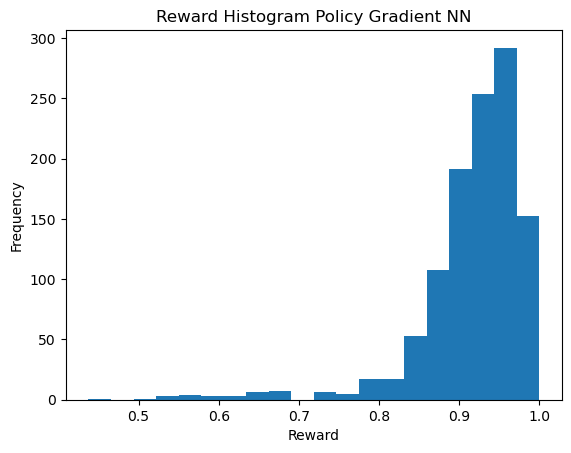

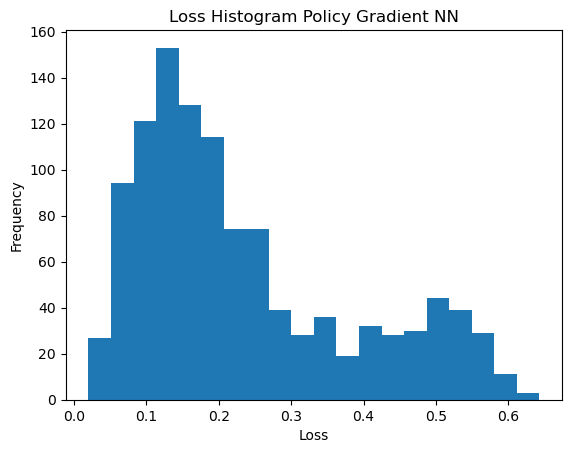

In [49]:
# Train model using policy_gradient REINFORCEMENT LEARNING Technique
# NAME: policy_gradient
# PARAMETERS:Call the policy_gradient function with the following parameters:
#            X_train_vectors: Training input data (features)
#            y_train: Training target labels
#            model: The trained neural network model
#            Adam(learning_rate): Adam optimizer with specified learning rate
#            epochs: Number of training epochs
#            batch_size: Batch size for training
#            gamma: Discount factor for rewards
# PURPOSE: This is used to call the function named policy_gradient with the provided arguments as input parameters.The purpose of this line of code is to invoke the policy_gradient function and pass in the required input parameters for it to train the model with the reinforcement technique . 
# PRECONDITION: X_train_vectors, y_train, model1, epochs, batch_size, gamma, and learning_rate should be appropriately defined and initialized before this function call.
# POSTCONDITION: The model's weights and biases being updated based on the policy gradient algorithm, the function is designed to update the model's parameters during training.

policy_gradient(X_train_vectors, y_train, model1, Adam(learning_rate), epochs, batch_size, gamma)

In [50]:
############################################# Evaluation of the NN model #######################################################

In [51]:
logits_q = model(X_test_vectors.toarray()) #logits is a tensor of shape (m, k), where m is the number of test examples and k is the number of classes. It is obtained by passing the test feature matrix X_test_vectors (which is in sparse format and converted to a dense numpy array using toarray()) through the neural network model model
predictions_q = np.argmax(logits_q.numpy(), axis=1) #predictions is a numpy array of shape (m,) that contains the predicted class labels for the test examples. It is obtained by taking the argmax of the logits tensor along the second axis (i.e., the axis corresponding to the classes). This returns the index of the class with the highest probability for each test example.

In [52]:
logits_pg = model1(X_test_vectors.toarray()) #logits is a tensor of shape (m, k), where m is the number of test examples and k is the number of classes. It is obtained by passing the test feature matrix X_test_vectors (which is in sparse format and converted to a dense numpy array using toarray()) through the neural network model model
predictions_pg = np.argmax(logits_pg.numpy(), axis=1) #predictions is a numpy array of shape (m,) that contains the predicted class labels for the test examples. It is obtained by taking the argmax of the logits tensor along the second axis (i.e., the axis corresponding to the classes). This returns the index of the class with the highest probability for each test example.

In [53]:
# accuracy for the Q-Learning model after Reinforcement algorithm training
accuracy_q = np.mean(predictions_q == y_test)  # Assuming y_test is a numpy array of ground truth labels
print("Accuracy of Q-Learning is of NN model :", accuracy_q) #calculates and reports various performance metrics of the model on the test set, such as accuracy, precision, recall, and F1-score.

Accuracy of Q-Learning is of NN model : 0.9527839643652561


In [54]:
# accuracy for the Policy Gradient model after Reinforcement algorithm training
accuracy_pg = np.mean(predictions_pg == y_test)  # Assuming y_test is a numpy array of ground truth labels
print("Accuracy of Policy gradient of NN model is :", accuracy_pg) #calculates and reports various performance metrics of the model on the test set, such as accuracy, precision, recall, and F1-score.

Accuracy of Policy gradient of NN model is : 0.9513363028953229


In [55]:
# f1 score for the Q-Learning model after Reinforcement algorithm training
from sklearn.metrics import f1_score # imports the f1_score function from the sklearn.metrics module.
score_q = f1_score(y_test,predictions_q) #calculates the F1 score of the predicted labels predictions compared to the true labels y_test, using the f1_score function. The resulting score is assigned to the variable score
print("F1-score of Q-learning of NN model is:",score_q) # prints the F1 score, which was calculated in the previous line, along with the label "F1-score:".

F1-score of Q-learning of NN model is: 0.9494636471990465


In [56]:
# f1 score for the Policy gradient model after Reinforcement algorithm training
from sklearn.metrics import f1_score # imports the f1_score function from the sklearn.metrics module.
score_pg = f1_score(y_test,predictions_pg) #calculates the F1 score of the predicted labels predictions compared to the true labels y_test, using the f1_score function. The resulting score is assigned to the variable score
print("F1-score of Policy gradient of NN model is:",score_pg) # prints the F1 score, which was calculated in the previous line, along with the label "F1-score:".

F1-score of Policy gradient of NN model is: 0.948056579103768


In [57]:
#Classification report for Q-Learning model after Reinforcement algorithm training
from sklearn.metrics import classification_report #imports the classification_report function from the sklearn.metrics module, which can be used to generate a report on the classification performance of a model.
print("classification report of Q-Learning of NN model:") #prints the classififcation report
print(classification_report(y_test,predictions_q)) #generates a classification report based on the predicted labels predictions and the true labels y_test, using the classification_report function.

classification report of Q-Learning of NN model:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4773
           1       0.95      0.95      0.95      4207

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



Confusion Matrix of Q-Learning of NN model:


<AxesSubplot:>

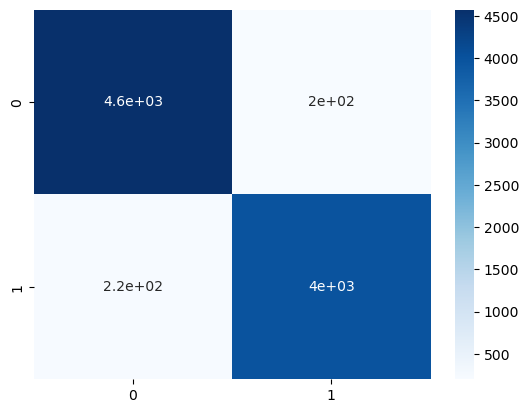

In [58]:
from sklearn.metrics import confusion_matrix # imports the confusion_matrix function from scikit-learn 
import seaborn as sns #seaborn library for creating visualizations.
print("Confusion Matrix of Q-Learning of NN model:") #prints a message to indicate the type of confusion matrix being displayed.
cm = confusion_matrix(y_test, predictions_q) #Calculates the confusion matrix for the Q-Learning model predictions on the test set.
sns.heatmap(cm, annot=True, cmap='Blues') #creates a heatmap using seaborn to visualize the confusion matrix, with annotations and a blue color map.

In [59]:
#Classification report for Policy gradient model after Reinforcement algorithm training
from sklearn.metrics import classification_report #imports the classification_report function from the sklearn.metrics module, which can be used to generate a report on the classification performance of a model.
print("classification report of Policy gradient of NN model:") #prints the classififcation report
print(classification_report(y_test,predictions_pg)) #generates a classification report based on the predicted labels predictions and the true labels y_test, using the classification_report function.

classification report of Policy gradient of NN model:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4773
           1       0.95      0.95      0.95      4207

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



Confusion Matrix of Policy gradient of NN model:


<AxesSubplot:>

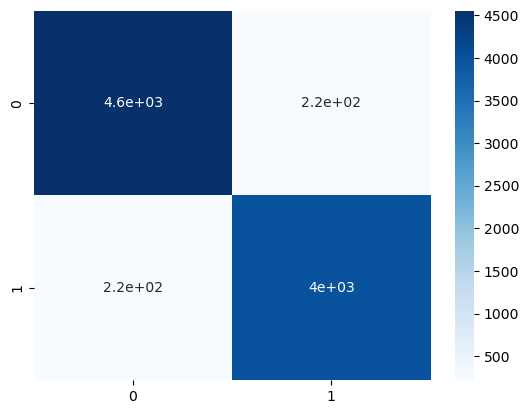

In [60]:
from sklearn.metrics import confusion_matrix #imports the confusion_matrix function from the scikit-learn library,
import seaborn as sns #import seaborn package
print("Confusion Matrix of Policy gradient of NN model:") #prints Confusion Matrix of Policy gradient of NN model:
cm = confusion_matrix(y_test, predictions_pg) #computes a confusion matrix to evaluate the performance of a classification model by comparing the true labels with the predicted labels.
sns.heatmap(cm, annot=True, cmap='Blues') # creates a heatmap visualization of the confusion matrix using the seaborn library.

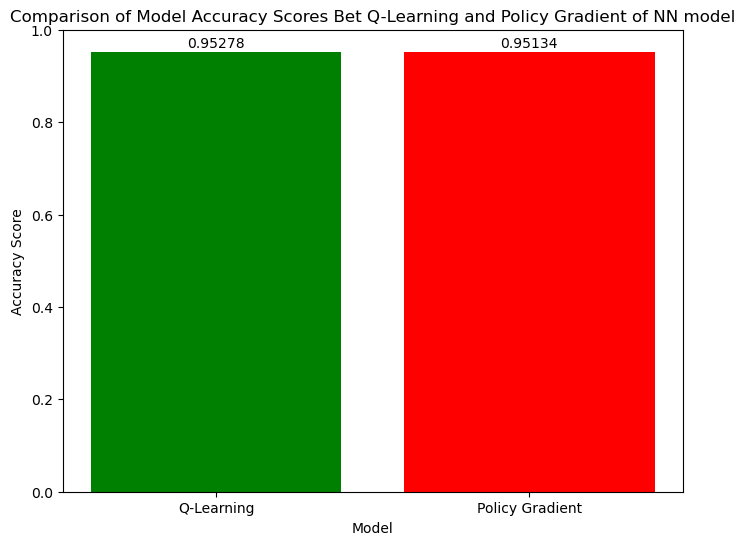

In [61]:
import matplotlib.pyplot as plt #importing matplotlib

# Example accuracy scores
accuracy_scores = [accuracy_q, accuracy_pg] #creates a list called accuracy_scores that contains the accuracy scores of two classification models based on Q-learning and policy gradient, respectively.

# Model names
model_names = ['Q-Learning', 'Policy Gradient'] #creates a list called model_names that contains the names of the two classification models used to generate accuracy_scores.
colors = ['green', 'red'] # list of colors for each bar

# Set up the bar chart
fig, ax = plt.subplots(figsize=(8, 6)) #creates a figure with a single subplot (axes) and sets the size of the figure to 8 inches (width) by 6 inches (height).
# Add the bars to the plot
for i in range(len(model_names)): #Loop over the model_names list.
    ax.bar(model_names[i], accuracy_scores[i], color=colors[i]) #Create a bar chart with a bar for each model name, height based on the corresponding accuracy score, and color specified by colors.

    # Add the accuracy score as text to the bar
    ax.text(model_names[i], accuracy_scores[i] + 0.01, round(accuracy_scores[i], 5), ha='center') #Add text labels to each bar with the corresponding accuracy score rounded to 5 decimal places.

# Add labels and titles
ax.set_xlabel('Model') #set the x-axis label to "Model"
ax.set_ylabel('Accuracy Score') #set the y-axis label to "Model"
ax.set_title('Comparison of Model Accuracy Scores Bet Q-Learning and Policy Gradient of NN model') #title to "Comparison of Model Accuracy Scores Bet Q-Learning and Policy Gradient of NN model", respectively, for the bar chart.

# Display the chart
plt.show() #Display the chart.

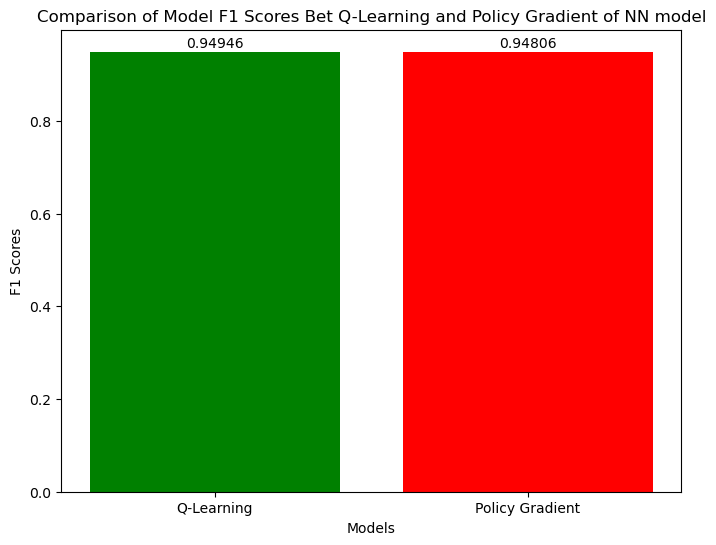

In [62]:
import matplotlib.pyplot as plt #Imports the pyplot module from the matplotlib library as plt.

# define model names and their respective F1 scores
model_names = ['Q-Learning', 'Policy Gradient'] # Define a list which will be used to plot the bar chart.
f1_scores = [score_q, score_pg] # Define a list which will be used to  plot the bar chart for F1 scores.
colors = ['green', 'red'] # list of colors for each bar
# Set up the bar chart
fig, ax = plt.subplots(figsize=(8, 6)) #Creates a new figure object and an axes object with a size of 8 inches by 6 inches.
# Add the bars to the plot
for i in range(len(model_names)):
    ax.bar(model_names[i], f1_scores[i], color=colors[i])

    # Add the accuracy score as text to the bar
    ax.text(model_names[i], f1_scores[i] + 0.01, round(f1_scores[i], 5), ha='center')


# add labels to the chart
plt.title('Comparison of Model F1 Scores Bet Q-Learning and Policy Gradient of NN model') #Adds a title
plt.xlabel('Models') #Adds xlabel to display models on the chart
plt.ylabel('F1 Scores') #Adds ylabel to the chart.

# display the chart
plt.show() #displays the chart

In [63]:
#################################################### LSTM Model #################################################################

In [64]:
################################################## LSTM_Policy Gradient ##########################################################

In [65]:
# imports the necessary libraries and packages required for building and training a deep learning model for text classification.
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, LSTM
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# Define the policy gradient function
# NAME: policy_gradient
# PURPOSE: To implement the policy gradient algorithm for training a LSTM model (model) using given input data (x) and target labels (y) with a specified optimizer (optimizer). The algorithm is trained for a given number of epochs (epochs) and batch size (batch_size), and uses a discount factor (gamma) for computing the model loss.
#          The purpose of this code is to train a LSTM model using the policy gradient algorithm, where the model's weights are updated based on the computed policy gradient and model loss, and the training process is performed in batches for efficiency.
# INVARIANTS: Calculates the length of the input data (x) using shape() method.length is an integer variable representing the number of rows in the input data x, used to determine the batch sizes and loop iterations in the training process.
#             Iterates over each epoch.
#             For each epoch, iterates over the input data (x) in batches of size batch_size.
#             For each batch, computes the logits (raw output) of the model for the input data using model(x_batch).
#             Computes the log probabilities of the logits using tf.math.log(tf.clip_by_value(logits, 1e-10, 1.0)).
#             Creates one-hot encoded labels from the target labels (y_batch) using tf.one_hot() method.
#             Computes the policy gradient loss by multiplying the log probabilities with the one-hot encoded labels and taking the negative mean using tf.reduce_mean(tf.reduce_sum(labels * log_probs, axis=1)).
#             Computes the gradients of the policy gradient loss with respect to the model's trainable weights using tape.gradient().
#             Applies the gradients to the optimizer using optimizer.apply_gradients() to update the model's weights.
#             Computes the average reward for the current batch and uses it as a baseline.
#             Computes the model loss by multiplying the policy gradient loss with the average reward and the discount factor (gamma).
#             Computes the gradients of the model loss with respect to the model's trainable weights using tape.gradient().
#             Applies the gradients to the optimizer using optimizer.apply_gradients() to update the model's weights.
#             The purpose of this code is to train a neural network model using the policy gradient algorithm, where the model's weights are updated based on the computed policy gradient and model loss, and the training process is performed in batches for efficiency.

def policy_gradient(x, y, model, optimizer, epochs, batch_size, gamma): #class to define the policy_gradient RL technique
   
    length = x.shape[0] #Calculates the length of the input data (x) using shape() method.
    for epoch in range(epochs): #Iterates over each epoch.
        epoch_rewards = [] #empty lists that are likely intended to store the rewards for each epoch during the training of a neural network.
        epoch_losses = [] #empty lists that are likely intended to store the losses for each epoch during the training of a neural network.
        for batch_start in range(0, length, batch_size): #It is used to iterate over the input data (x) in batches of size batch_size during the training process. It starts from the beginning of the input data and increments in steps of batch_size until it reaches the end of the data.
            batch_end = min(batch_start + batch_size, length) # It calculates the ending index (batch_end) of the current batch during the iteration over the input data (x) in batches. It ensures that the ending index does not exceed the total length of the data (length) to avoid accessing data beyond the available range. 
            x_batch = x[batch_start:batch_end] #Extracting a batch of data from the array 'x' using the start and end indices of the batch
            y_batch = y[batch_start:batch_end] #Extracting a batch of labels from the array 'y' using the start and end indices of the batch
            with tf.GradientTape() as tape: #tf.GradientTape() is a TensorFlow API that provides a mechanism for automatic differentiation, which is a key technique used in machine learning optimization algorithms, such as gradient descent. It allows you to compute gradients of a computation with respect to its input variables, which can then be used to update the values of those variables during optimization."tape" refers to a mechanism provided by TensorFlow that records operations for the purpose of computing gradients. The tape acts as a context within which computations are recorded, and these computations can later be used to compute gradients using the tape.gradient() method.
                logits = model(x_batch) #Passing the batch of input data 'x_batch' through the model to obtain logits.Logits are the output of the model before applying any activation function, typically used for classification tasks Logits represent the raw, unnormalized scores for each class, which can be used for further processing or prediction.'model' is the trained model that takes 'x_batch' as input and produces logits as output
                log_probs = tf.nn.log_softmax(logits) #code applies the softmax function to the output logits of the neural network model and then takes the logarithm of the resulting probabilities.The tf.nn.log_softmax function is a method from the TensorFlow library that applies the softmax function to the logits, which are the raw outputs of the neural network before the activation function is applied. The softmax function converts the logits into probabilities that sum to 1, allowing the outputs to be interpreted as probabilities of each class. the tf.nn.log_softmax function is used to convert the raw outputs of the neural network into probabilities that can be used for classification, and the logarithm is taken for numerical stability during the calculation of the loss function.
                labels = tf.one_hot(y_batch, depth=output_dim) #Converting the batch of labels 'y_batch' into one-hot encoding using 'tf.one_hot' function One-hot encoding represents categorical labels as binary vectors with a single '1' and remaining '0's.'y_batch' is the input tensor containing the batch of labels to be converted to one-hot encoding.'output_dim' specifies the depth of the one-hot encoding, which should be equal to the number of classes in the classification task
                rewards = tf.reduce_sum(labels * log_probs, axis=1) # Compute the reward using the log probability of the correct label
                loss = -tf.reduce_mean(rewards) # Maximize the expected reward
                grads = tape.gradient(loss, model.trainable_weights) #grads typically refers to the computed gradients of the loss function with respect to the trainable weights of a machine learning model.The tape.gradient() function in TensorFlow is used to compute the gradients of a given function (in this case, the loss function) with respect to a list of variables (in this case, the model.trainable_weights). These gradients can then be used in an optimization algorithm, such as gradient descent, to update the model weights and improve the model's performance during training.Compute the gradients of the loss with respect to the trainable weights of the model.loss: The computed loss value.model.trainable_weights: List of trainable weights of the model
            optimizer.apply_gradients(zip(grads, model.trainable_weights)) #It applies the computed gradients (grads) to update the model weights (model.trainable_weights) using an optimizer. The zip() function is used to create pairs of gradients and corresponding model weights, which are then passed to the apply_gradients() method of the optimizer to perform the weight update step. This step is a key part of the optimization process in training machine learning models, as it helps to adjust the model weights based on the gradients of the loss function, with the goal of minimizing the loss and improving the model's performance.
            
            epoch_rewards.append(rewards) #appends the rewards obtained by the network during the current epoch to the epoch_rewards list. This allows us to keep track of the rewards obtained by the network during each epoch of training.
            epoch_losses.append(loss.numpy()) # appends the loss obtained by the network during the current epoch to the epoch_losses list. This allows us to keep track of the loss obtained by the network during each epoch of training.The numpy() method is used to extract the numerical value of the TensorFlow loss object, which is a symbolic representation of the loss function used to train the network. This numerical value is then appended to the epoch_losses list.
            print("The rewards are:", rewards) #prints the rewards
            
    # Plot reward histogram
    plt.hist(epoch_rewards, bins=20) #creates a histogram plot of the distribution of the rewards obtained by the network during training, using 20 bins. This allows us to visualize how often the network obtained rewards in different ranges, which can provide insight into its overall performance.
    plt.title("Reward Histogram Policy Gradient LSTM") #sets the title of the plot to "Reward Histogram Policy Gradient LSTM", which describes the type of algorithm used and the type of data being plotted.
    plt.xlabel("Reward") #sets the x-axis label to "Reward", which describes the meaning of the values being plotted on the x-axis.
    plt.ylabel("Frequency") #sets the y-axis label to "Frequency", which describes the number of occurrences of rewards in each bin.
    plt.show() #displays the plot on the screen. This allows us to see the distribution of the rewards obtained by the network during training and gain insights into its performance.
    
        
    # Plot loss histogram
    plt.hist(epoch_losses, bins=20) # creates a histogram plot of the distribution of the losses obtained by the network during training, using 20 bins. This allows us to visualize how often the network had a certain level of loss during the training process, which can provide insights into how well the network is learning and improving over time.
    plt.title("Loss Histogram Policy Gradient LSTM") # sets the title of the plot to "Loss Histogram Policy Gradient LSTM", which describes the type of algorithm used and the type of data being plotted.
    plt.xlabel("Loss") # sets the x-axis label to "Loss", which describes the meaning of the values being plotted on the x-axis.
    plt.ylabel("Frequency") #sets the y-axis label to "Frequency", which describes the number of occurrences of losses in each bin.
    plt.show() # displays the plot on the screen. This allows us to see the distribution of the losses obtained by the network during training and gain insights into its performance.



In [67]:
#Parameters  
input_dim = X_train_vectors.shape[1] #sets the variable input_dim equal to the number of features in the training data.'X_train_vectors.shape[1]'' retrieves the number of columns (i.e., features) in the feature matrix X_train_vectors. This value represents the number of input dimensions or features for the classification model.
output_dim = len(np.unique(y_train)) #sets the variable output_dim equal to the number of unique target labels in the training data. These variables are likely used to define the input and output dimensions of the neural network or classification model being built.np.unique(y_train) returns the unique values of the target variable y_train. The length of this array is equal to the number of distinct target labels in the dataset.len(np.unique(y_train)) returns the number of unique target labels in the dataset. This value represents the number of output dimensions or classes for the classification model.

# Reshape the data for LSTM input
X_train_lstm = np.reshape(X_train_vectors.toarray(), (X_train_vectors.shape[0], 1, X_train_vectors.shape[1])) #X_train_vectors is the sparse matrix of shape (number of samples, number of features) that contains the training feature vectors. The toarray() method is used to convert this sparse matrix into a dense matriThe np.reshape() function is then used to reshape the dense matrix into a 3-dimensional array with shape (number of samples, 1, number of features). The first dimension represents the number of samples, the second dimension represents the number of time steps in the LSTM (which is set to 1 in this case), and the third dimension represents the number of features in each input vector.The reason for reshaping the input data in this way is because LSTM models require 3-dimensional input data, where the first dimension is the number of samples, the second dimension is the number of time steps, and the third dimension is the number of features.this line of code reshapes the training data from a dense matrix of shape (number of samples, number of features) to a 3-dimensional array of shape (number of samples, 1, number of features) that is suitable for training an LSTM model.
X_test_lstm = np.reshape(X_test_vectors.toarray(), (X_test_vectors.shape[0], 1, X_test_vectors.shape[1])) #X_test_vectors is the sparse matrix of shape (number of samples, number of features) that contains the test feature vectors. The toarray() method is used to convert this sparse matrix into a dense matrix.The np.reshape() function is then used to reshape the dense matrix into a 3-dimensional array with shape.The reason for reshaping the test data in this way is because the LSTM model expects input data with the same shape as the training data.this line of code reshapes the test data from a dense matrix of shape (number of samples, number of features) to a 3-dimensional array of shape (number of samples, 1, number of features) that is suitable for testing the LSTM model.


In [68]:
# Build the LSTM model and define the optimizer
# Name: Neural Network model
# Purpose: to define and create a LSTM neural network or classification model for a given dataset.
# Invariants: The input_dim variable contains the number of features in the input data.
#             The output_dim variable contains the number of classes in the target variable.
#             The inputs variable is an input layer that takes a 3-dimensional input of shape (number of samples, 1, input_dim).
#             The x variable is a hidden layer that applies a Long Short-Term Memory (LSTM) operation with 64 units and a Rectified Linear Unit (ReLU) activation function to the input.
#             The model2 variable is a Keras Model that takes inputs as input and x as output.
#             The optimizer variable is an Adam optimizer with a learning rate of 0.001 that is used to optimize the model during training.

inputs = Input(shape=(1, input_dim,)) #creates an input layer in Keras with 3 dimensions, defined by the shape parameter. The first dimension is set to 1, indicating that each input sample will have a single time step. The second dimension is set to input_dim, indicating the number of features in each time step. The inputs variable stores this input layer, which will be used as the input to the subsequent layers in the model.
x = LSTM(32, activation='relu')(inputs) # creates a Long Short-Term Memory (LSTM) layer in Keras with 64 units and the ReLU activation function. The inputs variable is passed as the input to this layer. The LSTM layer is a type of recurrent neural network layer that is commonly used for processing sequential data, such as text or time series data. The output of the LSTM layer is stored in the x variable and will be used as input to the subsequent layer in the model.
x = Dense(output_dim, activation='softmax')(x) #creates a dense layer with output_dim number of units and the softmax activation function. The x variable is passed as the input to this layer. The purpose of this layer is to perform the final classification of the input data, with each unit representing a different class. The output of the dense layer will be a probability distribution over the different classes, with the sum of the probabilities equal to 1. The output of this layer is stored in the x variable and will be used as the output of the model.
model2 = Model(inputs=inputs, outputs=x) # creates a Keras Model object that specifies the input and output layers of the neural network. The inputs variable represents the input layer of the model, which takes as input a tensor of shape (batch_size, 1, input_dim). The x variable represents the output layer of the model, which is the output of the last dense layer with softmax activation. The Model constructor takes two arguments: the input tensor and the output tensor. These tensors define the input and output of the model and all the layers in between. The resulting model2 object can be used to train and evaluate the neural network.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # initializes an instance of the Adam optimizer from the Keras API with a learning rate of 0.001. The Adam optimizer is a popular gradient descent optimization algorithm that is commonly used in deep learning.
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001) #RMSprop optimizer
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) # is an important line of code in the process of building a deep learning model using Keras. It compiles the model by specifying the loss function, optimizer, and metrics to be used during training.In particular, the loss parameter specifies the loss function that the model will use to evaluate its performance on the training data. In this case, the 'categorical_crossentropy' loss function is used, which is commonly used for multiclass classification problems.The optimizer parameter specifies the optimization algorithm that will be used to adjust the weights of the model during training in order to minimize the loss function. Here, the optimizer variable is passed in, which should be an instance of a pre-defined optimizer class from Keras, such as Adam or RMSprop.Finally, the metrics parameter specifies the evaluation metrics that will be used to monitor the model's performance during training and testing. In this case, 'accuracy' is the metric used, which is commonly used for classification problems.Overall, model.compile is a crucial step in the process of building and training a deep learning model, as it sets up the model for optimization by specifying the necessary components for the training process.
#model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy']) #loss:mean_squared_error


The rewards are: tf.Tensor(
[-0.69345134 -0.69139534 -0.6942791  -0.69248205 -0.6931962  -0.69166046
 -0.6914742  -0.6916415  -0.69415796 -0.69282895 -0.6918977  -0.6907193
 -0.69331384 -0.6912126  -0.69495773 -0.69456875 -0.69481766 -0.69214696
 -0.69523215 -0.69412315 -0.6945771  -0.69146943 -0.69497925 -0.69278616
 -0.69518876 -0.6937492  -0.69380414 -0.6953623  -0.6918068  -0.6922477
 -0.69443095 -0.692647  ], shape=(32,), dtype=float32)
The rewards are: tf.Tensor(
[-0.6920537  -0.69362116 -0.6921275  -0.6927142  -0.6925007  -0.69382334
 -0.69271517 -0.69300365 -0.6937326  -0.692665   -0.69371295 -0.69211143
 -0.6916281  -0.69319826 -0.69254273 -0.69315577 -0.69225943 -0.69296587
 -0.694146   -0.69298565 -0.693382   -0.6931693  -0.69367194 -0.69376636
 -0.69190735 -0.6920014  -0.693943   -0.6934016  -0.69320726 -0.69281083
 -0.6920156  -0.6922546 ], shape=(32,), dtype=float32)
The rewards are: tf.Tensor(
[-0.6927979  -0.6934184  -0.6920156  -0.6939764  -0.6935812  -0.69354236
 -0.6

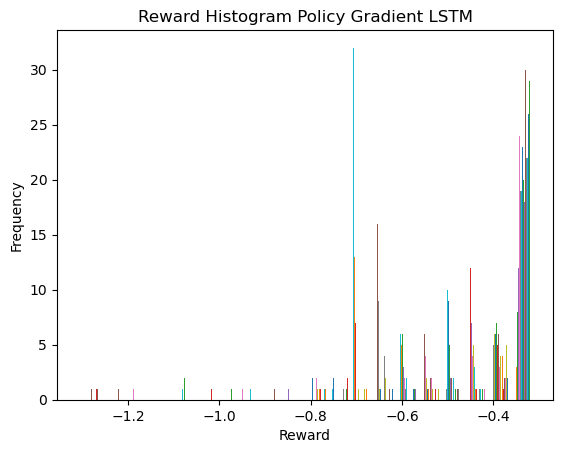

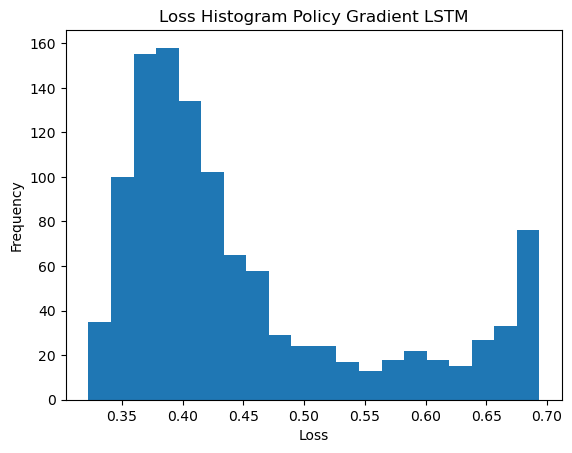

In [69]:
# Train model using policy_gradient REINFORCEMENT LEARNING Technique
# NAME: policy_gradient
# PARAMETERS:Call the policy_gradient function with the following parameters:
#            X_train_vectors: Training input data (features)
#            y_train: Training target labels
#            model: The trained neural network model
#            Adam(learning_rate): Adam optimizer with specified learning rate
#            epochs: Number of training epochs
#            batch_size: Batch size for training
#            gamma: Discount factor for rewards
# PURPOSE: This is used to call the function named policy_gradient with the provided arguments as input parameters.The purpose of this line of code is to invoke the policy_gradient function and pass in the required input parameters for it to train the model with the reinforcement technique . 
# PRECONDITION: X_train_lstm, y_train, model2, epochs, batch_size, gamma, and learning_rate should be appropriately defined and initialized before this function call.
# POSTCONDITION: The model's weights and biases being updated based on the policy gradient algorithm, the function is designed to update the model's parameters during training.

policy_gradient(X_train_lstm, y_train, model2, optimizer, epochs=1, batch_size=32, gamma=0.95)

In [70]:
################################################## LSTM_Q-Learning ###############################################################

In [71]:
# Define the Q-learning function
# Define Q-LEARNING Technique for LSTM model
# NAME: q_learning
# PURPOSE: to implement the Q-learning technique for training a LSTM model (model) using given input data (x) and target labels (y) with a specified optimizer (optimizer). The algorithm is trained for a given number of epochs (epochs) and batch size (batch_size), and uses a discount factor (gamma) for computing the Q-values and rewards. The Q-values and rewards are used to modify the loss function and update the model's weights. The code also includes the visualization of reward and loss histograms for analysis. 
#          The purpose of this code is to define the Q-learning function for a LSTM model, which can be used for reinforcement learning tasks.
# INVARIANTS: Calculates the length of the input data (x) using shape() method.length is an integer variable representing the number of rows in the input data x, used to determine the batch sizes and loop iterations in the training process.
#             The input data y should be a numpy array of target labels for each sample in x.
#             The model should be a neural network model implemented using TensorFlow.
#             The optimizer should be an instance of a TensorFlow optimizer (e.g. Adam optimizer).
#             Epochs should be an integer specifying the number of times to iterate over the input data.
#             batch_size should be an integer specifying the size of each batch during training.
#             gamma should be a float specifying the discount factor for future rewards in the Q-learning algorithm.
#             The training process involves iterating over the input data in batches of size batch_size, and for each batch:
#             The logits (raw output) of the model for the input data x_batch are computed using model(x_batch).
#             The log probabilities of the logits are computed using tf.math.log(tf.clip_by_value(logits, 1e-10, 1.0)).
#             One-hot encoded labels are created from the target labels y_batch using tf.one_hot() method.
#             The maximum Q-value for each sample in the batch is computed using tf.reduce_max(logits, axis=1).
#             The maximum Q-value is used as the reward and is converted to a numpy array using q_values.numpy().
#             The policy gradient loss is computed by multiplying the log probabilities with the one-hot encoded labels and taking the negative mean using tf.reduce_mean(tf.reduce_sum(labels * log_probs, axis=1) * rewards).
#             The gradients of the policy gradient loss with respect to the model's trainable weights are computed using tape.gradient().
#             The gradients are applied to the optimizer using optimizer.apply_gradients() to update the model's weights.
#             The average reward for the current batch is computed and used as a baseline.
#             The model loss is computed by multiplying the policy gradient loss with the average reward and the discount factor (gamma).
#             The gradients of the model loss with respect to the model's trainable weights are computed using tape.gradient().
#             The gradients are applied to the optimizer using optimizer.apply_gradients() to update the model's weights.
#             The rewards and losses for each epoch are stored in epoch_rewards and epoch_losses, respectively.
#             After training, the reward and loss histograms for all epochs are plotted using plt.hist().


def q_learning(x, y, model, optimizer, epochs, batch_size, gamma):#class to define the Q-Learning technique
    length = x.shape[0] #Iterates over each epoch.
    for epoch in range(epochs):
        epoch_rewards = [] #empty lists that are likely intended to store the rewards for each epoch during the training of a neural network.
        epoch_losses = [] #empty lists that are likely intended to store the losses for each epoch during the training of a neural network.
        for batch_start in range(0, length, batch_size): #It is used to iterate over the input data (x) in batches of size batch_size during the training process. It starts from the beginning of the input data and increments in steps of batch_size until it reaches the end of the data. 
            batch_end = min(batch_start + batch_size, length) #It calculates the ending index (batch_end) of the current batch during the iteration over the input data (x) in batches. It ensures that the ending index does not exceed the total length of the data (length) to avoid accessing data beyond the available range. 
            x_batch = x[batch_start:batch_end] #Extracting a batch of data from the array 'x' using the start and end indices of the batch
            y_batch = y[batch_start:batch_end] #Extracting a batch of labels from the array 'y' using the start and end indices of the batch
            
            with tf.GradientTape() as tape: #tf.GradientTape() is a TensorFlow API that provides a mechanism for automatic differentiation, which is a key technique used in machine learning optimization algorithms, such as gradient descent. It allows you to compute gradients of a computation with respect to its input variables, which can then be used to update the values of those variables during optimization."tape" refers to a mechanism provided by TensorFlow that records operations for the purpose of computing gradients. The tape acts as a context within which computations are recorded, and these computations can later be used to compute gradients using the tape.gradient() method.
                logits = model(x_batch) #Passing the batch of input data 'x_batch' through the model to obtain logits.Logits are the output of the model before applying any activation function, typically used for classification tasks Logits represent the raw, unnormalized scores for each class, which can be used for further processing or prediction.'model' is the trained model that takes 'x_batch' as input and produces logits as output.
                log_probs = tf.math.log(tf.clip_by_value(logits, 1e-10, 1.0)) # calculates the log probabilities by taking the natural logarithm (tf.math.log()) of the model's predicted logits (logits). The tf.clip_by_value() function is used to clip the logits to a specific range to avoid numerical instability. In this case, the minimum value is set to 1e-10 and the maximum value is set to 1.0. The resulting log probabilities are stored in the log_probs variable.
                labels = tf.one_hot(y_batch, depth=output_dim) #Converting the batch of labels 'y_batch' into one-hot encoding using 'tf.one_hot' function One-hot encoding represents categorical labels as binary vectors with a single '1' and remaining '0's.'y_batch' is the input tensor containing the batch of labels to be converted to one-hot encoding.'output_dim' specifies the depth of the one-hot encoding, which should be equal to the number of classes in the classification task
                q_values = tf.reduce_max(logits, axis=1) # Compute the maximum Q-value for each sample in the batch
                rewards = q_values.numpy() # Use the maximum Q-value as the reward
                loss = -tf.reduce_mean(tf.reduce_sum(labels * log_probs, axis=1) * rewards) # Modify the loss function to include the reward
                grads = tape.gradient(loss, model.trainable_weights)  #grads typically refers to the computed gradients of the loss function with respect to the trainable weights of a machine learning model.The tape.gradient() function in TensorFlow is used to compute the gradients of a given function (in this case, the loss function) with respect to a list of variables (in this case, the model.trainable_weights). These gradients can then be used in an optimization algorithm, such as gradient descent, to update the model weights and improve the model's performance during training.Compute the gradients of the loss with respect to the trainable weights of the model.loss: The computed loss value.model.trainable_weights: List of trainable weights of the model
            optimizer.apply_gradients(zip(grads, model.trainable_weights)) #It applies the computed gradients (grads) to update the model weights (model.trainable_weights) using an optimizer. The zip() function is used to create pairs of gradients and corresponding model weights, which are then passed to the apply_gradients() method of the optimizer to perform the weight update step. This step is a key part of the optimization process in training machine learning models, as it helps to adjust the model weights based on the gradients of the loss function, with the goal of minimizing the loss and improving the model's performance.
            print("The rewards are:", rewards) #prints the rewards
            epoch_rewards.append(rewards) #appends the rewards obtained by the network during the current epoch to the epoch_rewards list. This allows us to keep track of the rewards obtained by the network during each epoch of training.
            epoch_losses.append(loss.numpy())  # appends the loss obtained by the network during the current epoch to the epoch_losses list. This allows us to keep track of the loss obtained by the network during each epoch of training.The numpy() method is used to extract the numerical value of the TensorFlow loss object, which is a symbolic representation of the loss function used to train the network. This numerical value is then appended to the epoch_losses list.
    
                
    # Plot reward histogram
    plt.hist(epoch_rewards, bins=20) #creates a histogram plot of the distribution of the rewards obtained by the network during training, using 20 bins. This allows us to visualize how often the network obtained rewards in different ranges, which can provide insight into its overall performance.
    plt.title("Reward Histogram Q-Learning NN") # sets the title of the plot to "Reward Histogram Q-Learning NN", which describes the type of algorithm used and the type of data being plotted.
    plt.xlabel("Reward") #sets the x-axis label to "Reward", which describes the meaning of the values being plotted on the x-axis.
    plt.ylabel("Frequency") #sets the y-axis label to "Frequency", which describes the number of occurrences of rewards in each bin.
    plt.show() #displays the plot on the screen. This allows us to see the distribution of the rewards obtained by the network during training and gain insights into its performance.
    
    # Plot loss histogram 
    plt.hist(epoch_losses, bins=20) # creates a histogram plot of the distribution of the losses obtained by the network during training, using 20 bins. This allows us to visualize how often the network had a certain level of loss during the training process, which can provide insights into how well the network is learning and improving over time.
    plt.title("Loss Histogram Q-Learning NN") #sets the title of the plot to "Loss Histogram Q-Learning NN", which describes the type of algorithm used and the type of data being plotted.
    plt.xlabel("Loss") # sets the x-axis label to "Loss", which describes the meaning of the values being plotted on the x-axis.
    plt.ylabel("Frequency") #sets the y-axis label to "Frequency", which describes the number of occurrences of losses in each bin.
    plt.show() # displays the plot on the screen. This allows us to see the distribution of the losses obtained by the network during training and gain insights into its performance.

In [72]:
#parameters
#Use the same parameters as for policy_gradient LSTM model as above
#input_dim = X_train_vectors.shape[1]
#output_dim = len(np.unique(y_train))

# Reshape the data for LSTM input
#X_train_lstm = np.reshape(X_train_vectors.toarray(), (X_train_vectors.shape[0], 1, X_train_vectors.shape[1]))
#X_test_lstm = np.reshape(X_test_vectors.toarray(), (X_test_vectors.shape[0], 1, X_test_vectors.shape[1]))



In [73]:
# Build the LSTM model and define the optimizer
# Name: Neural Network model
# Purpose: to define and create a LSTM neural network or classification model for a given dataset.
# Invariants: The input_dim variable contains the number of features in the input data.
#             The output_dim variable contains the number of classes in the target variable.
#             The inputs variable is an input layer that takes a 3-dimensional input of shape (number of samples, 1, input_dim).
#             The x variable is a hidden layer that applies a Long Short-Term Memory (LSTM) operation with 64 units and a Rectified Linear Unit (ReLU) activation function to the input.
#             The model3 variable is a Keras Model that takes inputs as input and x as output.
#             The optimizer variable is an Adam optimizer with a learning rate of 0.001 that is used to optimize the model during training.

inputs = Input(shape=(1, input_dim,)) #creates an input layer in Keras with 3 dimensions, defined by the shape parameter. The first dimension is set to 1, indicating that each input sample will have a single time step. The second dimension is set to input_dim, indicating the number of features in each time step. The inputs variable stores this input layer, which will be used as the input to the subsequent layers in the model.
x = LSTM(32, activation='relu')(inputs) # creates a Long Short-Term Memory (LSTM) layer in Keras with 64 units and the ReLU activation function. The inputs variable is passed as the input to this layer. The LSTM layer is a type of recurrent neural network layer that is commonly used for processing sequential data, such as text or time series data. The output of the LSTM layer is stored in the x variable and will be used as input to the subsequent layer in the model.
x = Dense(output_dim, activation='softmax')(x) #creates a dense layer with output_dim number of units and the softmax activation function. The x variable is passed as the input to this layer. The purpose of this layer is to perform the final classification of the input data, with each unit representing a different class. The output of the dense layer will be a probability distribution over the different classes, with the sum of the probabilities equal to 1. The output of this layer is stored in the x variable and will be used as the output of the model.
model3 = Model(inputs=inputs, outputs=x) # creates a Keras Model object that specifies the input and output layers of the neural network. The inputs variable represents the input layer of the model, which takes as input a tensor of shape (batch_size, 1, input_dim). The x variable represents the output layer of the model, which is the output of the last dense layer with softmax activation. The Model constructor takes two arguments: the input tensor and the output tensor. These tensors define the input and output of the model and all the layers in between. The resulting model3 object can be used to train and evaluate the neural network.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # initializes an instance of the Adam optimizer from the Keras API with a learning rate of 0.001. The Adam optimizer is a popular gradient descent optimization algorithm that is commonly used in deep learning.
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001) #RMSprop optimizer
#model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) # is an important line of code in the process of building a deep learning model using Keras. It compiles the model by specifying the loss function, optimizer, and metrics to be used during training.In particular, the loss parameter specifies the loss function that the model will use to evaluate its performance on the training data. In this case, the 'categorical_crossentropy' loss function is used, which is commonly used for multiclass classification problems.The optimizer parameter specifies the optimization algorithm that will be used to adjust the weights of the model during training in order to minimize the loss function. Here, the optimizer variable is passed in, which should be an instance of a pre-defined optimizer class from Keras, such as Adam or RMSprop.Finally, the metrics parameter specifies the evaluation metrics that will be used to monitor the model's performance during training and testing. In this case, 'accuracy' is the metric used, which is commonly used for classification problems.Overall, model.compile is a crucial step in the process of building and training a deep learning model, as it sets up the model for optimization by specifying the necessary components for the training process.
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy']) #loss:mean_squared_error


The rewards are: [0.5015963  0.5010962  0.50025403 0.5002769  0.50064456 0.50001943
 0.500169   0.5011169  0.5001677  0.5002142  0.5001276  0.5000235
 0.50028896 0.5002861  0.5008515  0.500551   0.5008875  0.5002846
 0.500448   0.500543   0.50001305 0.5003037  0.5000944  0.5007639
 0.5009596  0.50093544 0.500536   0.5008638  0.50148994 0.5007094
 0.50047964 0.5006105 ]
The rewards are: [0.50103396 0.5002012  0.5006951  0.5009573  0.5007132  0.50031626
 0.5002106  0.50156003 0.5023263  0.5001407  0.50141156 0.500062
 0.5003131  0.5019356  0.5008604  0.50040495 0.50157934 0.50000316
 0.5007609  0.50099206 0.50113964 0.50100577 0.50211716 0.50138444
 0.50107676 0.5010752  0.5000351  0.50039566 0.50012743 0.50108486
 0.5006831  0.50214523]
The rewards are: [0.5011547  0.501001   0.50024706 0.5017034  0.5010142  0.50033087
 0.50219256 0.5022765  0.50142586 0.5009932  0.5013283  0.501351
 0.50117874 0.5018372  0.50163966 0.50059474 0.50007045 0.50261384
 0.5005911  0.5001678  0.5017154  0.50

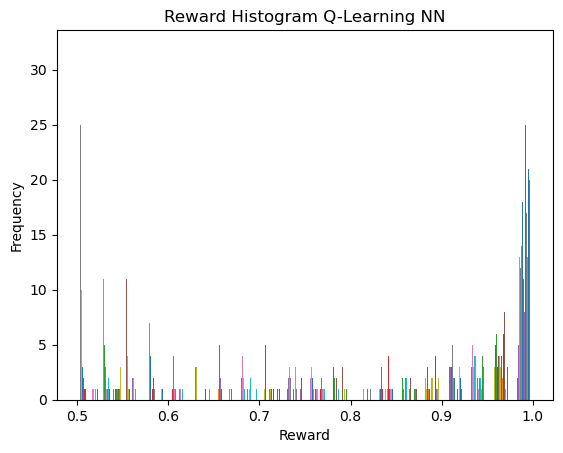

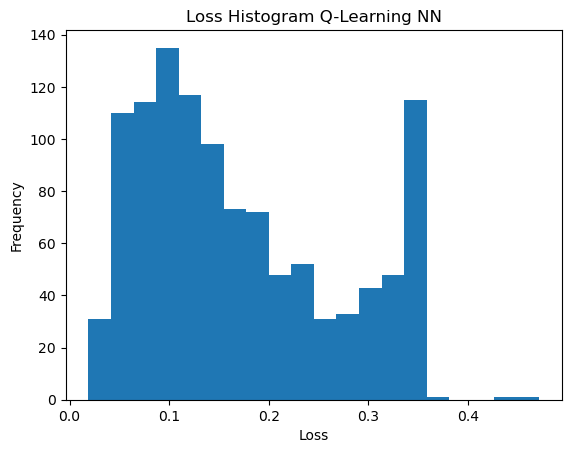

In [74]:
# Train model using Q-learning REINFORCEMENT LEARNING Technique
# NAME: Q_learning
# PARAMETERS:Call the Q_learning function with the following parameters:
#            X_train_vectors: Training input data (features)
#            y_train: Training target labels
#            model: The trained neural network model
#            Adam(learning_rate): Adam optimizer with specified learning rate
#            epochs: Number of training epochs
#            batch_size: Batch size for training
#            gamma: Discount factor for rewards
# PURPOSE: This is used to call the function named Q_learning with the provided arguments as input parameters.The purpose of this line of code is to invoke the Q_learning function and pass in the required input parameters for it to train the model with the reinforcement technique . 
# PRECONDITION: X_train_lstm, y_train, model3, epochs, batch_size, gamma, and learning_rate should be appropriately defined and initialized before this function call.
# POSTCONDITION: The model's weights and biases being updated based on the policy gradient algorithm, the function is designed to update the model's parameters during training.

q_learning(X_train_lstm, y_train, model3, optimizer, epochs=1, batch_size=32, gamma=0.95)

In [75]:
############################################# Evaluation of the LSTM model #######################################################

In [76]:
# Evaluate the model
logits_q_lstm = model3(X_test_lstm) #logits is a tensor of shape (m, k), where m is the number of test examples and k is the number of classes. It is obtained by passing the test feature matrix X_test_vectors (which is in sparse format and converted to a dense numpy array using toarray()) through the neural network model model
predictions_q_lstm = np.argmax(logits_q_lstm.numpy(), axis=1) #predictions is a numpy array of shape (m,) that contains the predicted class labels for the test examples. It is obtained by taking the argmax of the logits tensor along the second axis (i.e., the axis corresponding to the classes). This returns the index of the class with the highest probability for each test example.

In [77]:
# Evaluate the model
logits_pg_lstm = model2(X_test_lstm) #logits is a tensor of shape (m, k), where m is the number of test examples and k is the number of classes. It is obtained by passing the test feature matrix X_test_vectors (which is in sparse format and converted to a dense numpy array using toarray()) through the neural network model model
predictions_pg_lstm = np.argmax(logits_pg_lstm.numpy(), axis=1) #predictions is a numpy array of shape (m,) that contains the predicted class labels for the test examples. It is obtained by taking the argmax of the logits tensor along the second axis (i.e., the axis corresponding to the classes). This returns the index of the class with the highest probability for each test example.

In [78]:
# accuracy for the Q-Learning model after Reinforcement algorithm training
accuracy_q_lstm = np.mean(predictions_q_lstm == y_test) #calculates the accuracy of a LSTM model's predictions on a test set by comparing the predicted labels to the ground truth labels and computing the proportion of correct predictions.
print("Accuracy of Q-Learning is of LSTM model :", accuracy_q_lstm) #prints out the accuracy of the LSTM model's predictions on a test set, which was computed earlier and stored in the variable accuracy_q_lstm. The output will be a string that includes the text "Accuracy of Q-Learning is of LSTM model :" followed by the value of accuracy_q_lstm

Accuracy of Q-Learning is of LSTM model : 0.9507795100222717


In [79]:
# accuracy for the Policy Gradient model after Reinforcement algorithm training
accuracy_pg_lstm = np.mean(predictions_pg_lstm == y_test) #computes the accuracy of a LSTM model's predictions on a test set for a policy gradient algorithm, and stores the resulting value in the variable accuracy_pg_lstm. The accuracy is calculated by comparing the predicted labels to the ground truth labels and computing the proportion of correct predictions using a NumPy function.
print("Accuracy of Policy gradient of LSTM model is :", accuracy_pg_lstm) #prints out the accuracy of the LSTM model's predictions on a test set using a policy gradient algorithm, which was computed earlier and stored in the variable accuracy_pg_lstm. The output will be a string that includes the text "Accuracy of Policy gradient of LSTM model is :" followed by the value of accuracy_pg_lstm. 

Accuracy of Policy gradient of LSTM model is : 0.9473273942093541


In [80]:
# f1 score for the Q-Learning model after Reinforcement algorithm training
from sklearn.metrics import f1_score # imports the f1_score function from the sklearn.metrics module.
score_q_lstm = f1_score(y_test,predictions_q_lstm) #calculates the F1 score of the predicted labels predictions compared to the true labels y_test, using the f1_score function. The resulting score is assigned to the variable score
print("F1-score of Q-learning of LSTM model is:",score_q_lstm) # prints the F1 score, which was calculated in the previous line, along with the label "F1-score:".

F1-score of Q-learning of LSTM model is: 0.9475930756461939


In [81]:
# f1 score for the Policy gradient model after Reinforcement algorithm training
from sklearn.metrics import f1_score # imports the f1_score function from the sklearn.metrics module.
score_pg_lstm = f1_score(y_test,predictions_pg_lstm) #calculates the F1 score of the predicted labels predictions compared to the true labels y_test, using the f1_score function. The resulting score is assigned to the variable score
print("F1-score of Policy gradient of LSTM model is:",score_pg_lstm) # prints the F1 score, which was calculated in the previous line, along with the label "F1-score:".

F1-score of Policy gradient of LSTM model is: 0.9440567711413365


In [82]:
#Classification report for Q-Learning model after Reinforcement algorithm training
from sklearn.metrics import classification_report #imports the classification_report function from the sklearn.metrics module, which can be used to generate a report on the classification performance of a model.
print("classification report of Q-Learning of LSTM model:") #This line of code is a print statement that displays a message on the screen indicating that the classification report for the Q-Learning of LSTM model will be displayed next. A classification report is a table that summarizes the performance of a classification model on a set of test data, and it typically includes metrics such as precision, recall, and F1-score for each class in the dataset.
print(classification_report(y_test,predictions_q_lstm)) #generates a classification report based on the predicted labels predictions and the true labels y_test, using the classification_report function.

classification report of Q-Learning of LSTM model:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4773
           1       0.95      0.95      0.95      4207

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



Confusion Matrix of Q-Learning of LSTM model:


<AxesSubplot:>

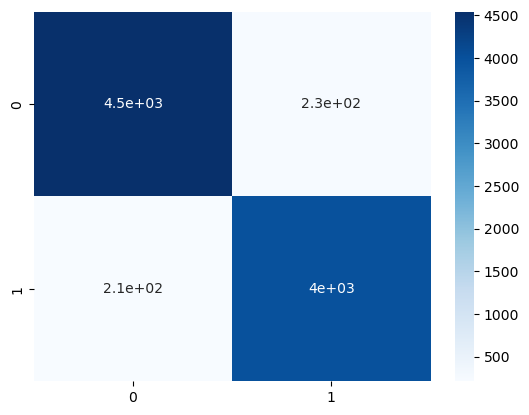

In [83]:
from sklearn.metrics import confusion_matrix # imports the confusion_matrix function from the sklearn.metrics module,
import seaborn as sns #imports the seaborn library, 
print("Confusion Matrix of Q-Learning of LSTM model:") #This line of code is a print statement that displays a message on the screen indicating that the confusion matrix for the Q-Learning of LSTM model will be displayed
cm = confusion_matrix(y_test, predictions_q_lstm) #computes the confusion matrix for the Q-Learning of LSTM model by calling the confusion_matrix function from the sklearn.metrics library.
sns.heatmap(cm, annot=True, cmap='Blues') #generates a heatmap visualization of the confusion matrix for the Q-Learning of LSTM model using the heatmap function from the seaborn library.

In [84]:
#Classification report for Policy gradient model after Reinforcement algorithm training
from sklearn.metrics import classification_report #imports the classification_report function from the sklearn.metrics module, which can be used to generate a report on the classification performance of a model.
print("classification report of Policy gradient of LSTM model:") #prints the classification report
print(classification_report(y_test,predictions_pg_lstm)) #generates a classification report based on the predicted labels predictions and the true labels y_test, using the classification_report function.

classification report of Policy gradient of LSTM model:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4773
           1       0.94      0.95      0.94      4207

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



Confusion Matrix of Policy gradient of LSTM model:


<AxesSubplot:>

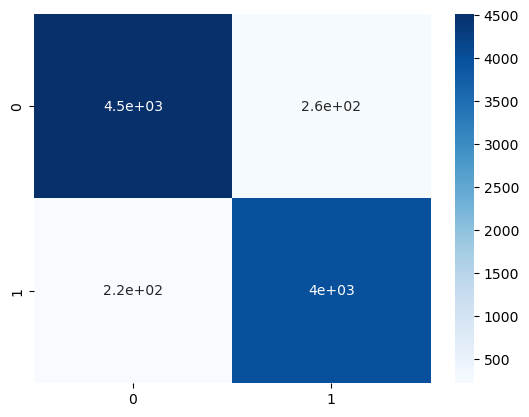

In [85]:
from sklearn.metrics import confusion_matrix # imports the confusion_matrix function from the sklearn.metrics module,
import seaborn as sns #imports the seaborn library,
print("Confusion Matrix of Policy gradient of LSTM model:") #This line of code is a print statement that displays a message on the screen indicating that the confusion matrix for the Policy Gradient of LSTM model will be displayed
cm = confusion_matrix(y_test, predictions_pg_lstm) #computes the confusion matrix for the Q-Learning of LSTM model by calling the confusion_matrix function from the sklearn.metrics library.
sns.heatmap(cm, annot=True, cmap='Blues') #generates a heatmap visualization of the confusion matrix for the Q-Learning of LSTM model using the heatmap function from the seaborn library. 

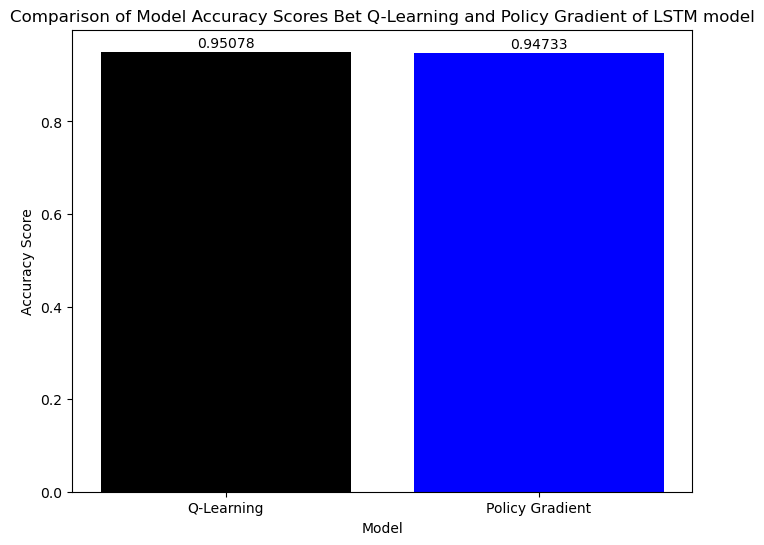

In [86]:
import matplotlib.pyplot as plt # imports the matplotlib.pyplot library under the alias plt. matplotlib

# Example accuracy scores
accuracy_scores = [accuracy_q_lstm, accuracy_pg_lstm] #creates a Python list called accuracy_scores that contains the accuracy scores for both the Q-Learning and Policy Gradient models of the LSTM.

# Model names
model_names = ['Q-Learning', 'Policy Gradient'] #creates a Python list called model_names that contains the names of the two models used in the analysis, i.e., Q-Learning and Policy Gradient.

colors = ['black', 'blue'] # list of colors for each bar

# Set up the bar chart
fig, ax = plt.subplots(figsize=(8, 6)) #creates a new plot using matplotlib with a size of 8 inches by 6 inches. The plot will be rendered on a single axis, which is stored in the variable ax, and can be further customized using ax methods.
# Add the bars to the plot
for i in range(len(model_names)): # loop is used to iterate through the list of model names and accuracy scores, and a new bar is added to the plot for each model.
    ax.bar(model_names[i], accuracy_scores[i], color=colors[i]) #code adds a new bar to the bar chart for the ith model in model_names

    # Add the accuracy score as text to the bar
    ax.text(model_names[i], accuracy_scores[i] + 0.01, round(accuracy_scores[i], 5), ha='center') #code adds a label to the top of each bar in the bar chart.

# Add labels and titles
ax.set_xlabel('Model') # code adds a label to the x-axis of the bar chart indicating that it represents the "Model" category.
ax.set_ylabel('Accuracy Score') #adds a label to the y-axis of the bar chart indicating that it represents the "Accuracy Score" category.
ax.set_title('Comparison of Model Accuracy Scores Bet Q-Learning and Policy Gradient of LSTM model') # code sets the title of the bar chart to "Comparison of Model Accuracy Scores Bet Q-Learning and Policy Gradient of LSTM model".

# Display the chart
plt.show() #line of code displays the bar chart on the screen

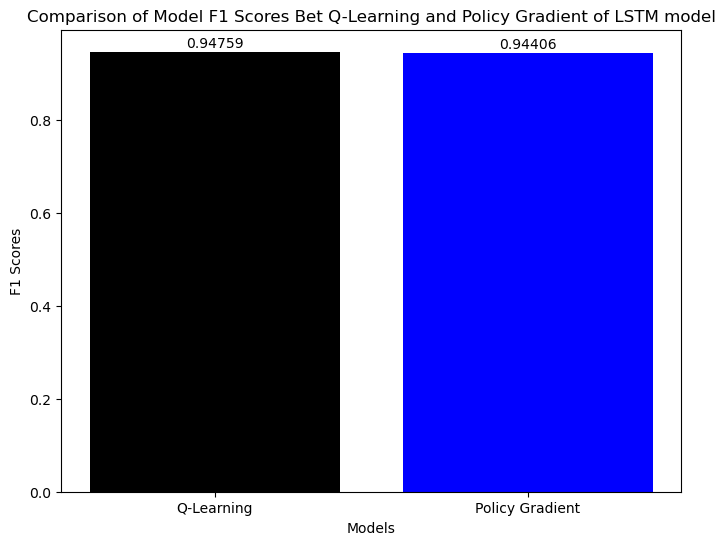

In [87]:
import matplotlib.pyplot as plt # imports the pyplot module from the matplotlib library under the alias plt.


# define model names and their respective F1 scores
model_names = ['Q-Learning', 'Policy Gradient'] # creates a list of two model names, 'Q-Learning' and 'Policy Gradient'.
f1_scores = [score_q_lstm, score_pg_lstm] # creates a list of two F1 scores for two models.
colors = ['black', 'blue'] # list of colors for each bar
# Set up the bar chart
fig, ax = plt.subplots(figsize=(8, 6)) #creates a new plot using matplotlib with a size of 8 inches by 6 inches. The plot will be rendered on a single axis, which is stored in the variable ax, and can be further customized using ax methods.
# Add the bars to the plot
for i in range(len(model_names)): # loop is used to iterate through the list of model names and accuracy scores, and a new bar is added to the plot for each model.
    ax.bar(model_names[i], f1_scores[i], color=colors[i]) #code adds a new bar to the bar chart for the ith model in model_names

    # Add the accuracy score as text to the bar
    ax.text(model_names[i], f1_scores[i] + 0.01, round(f1_scores[i], 5), ha='center') #adds text labels to a bar chart to display the F1 scores for each bar, using the text() method of a Matplotlib Axes object.


# add labels to the chart
plt.title('Comparison of Model F1 Scores Bet Q-Learning and Policy Gradient of LSTM model') #sets the title of a plot comparing the F1 scores of Q-Learning and Policy Gradient of an LSTM model.
plt.xlabel('Models') # sets the x-axis label of a plot as "Models".
plt.ylabel('F1 Scores') #sets the y-axis label of a plot as "F1 Scores".

# display the chart
plt.show() # displays the plot that has been created using the previous commands.

In [88]:
################################################### Evaluation of the full Code ###############################################

In [89]:
#Accuracy Metrix

# Create a dictionary with the data
accuracy_data = {'Q_learning': [accuracy_q, accuracy_q_lstm], 
        'Policy_gradient': [accuracy_pg, accuracy_pg_lstm]} # creates a dictionary accuracy_data with accuracy values for Q-learning and Policy Gradient models, with and without LSTM, stored in lists.

# Create a Pandas dataframe with the data
df_accuracy = pd.DataFrame(accuracy_data ,index=['NN_model', 'LSTM_model']) # converts the accuracy_data dictionary into a Pandas DataFrame named df_accuracy with row indexes 'NN_model' and 'LSTM_model'.

print("Accuracy Metrix of Q-Learning and Policy Gradient with NN and LSTM model ") # prints Accuracy Metrix of Q-Learning and Policy Gradient with NN and LSTM model
print("")
# Print the dataframe
print(df_accuracy) #Prints dataframe


Accuracy Metrix of Q-Learning and Policy Gradient with NN and LSTM model 

            Q_learning  Policy_gradient
NN_model      0.952784         0.951336
LSTM_model    0.950780         0.947327


In [90]:
#Accuracy Metrix

# Create a dictionary with the data
F1_score_data = {'Q_learning': [score_q, score_q_lstm], # creates a dictionary F1score with accuracy values for Q-learning and Policy Gradient models, with and without LSTM, stored in lists.

        'Policy_gradient': [score_pg, score_pg_lstm]}

# Create a Pandas dataframe with the data
df_F1_score = pd.DataFrame(F1_score_data ,index=['NN_model', 'LSTM_model']) # converts the accuracy_data dictionary into a Pandas DataFrame named df_accuracy with row indexes 'NN_model' and 'LSTM_model'.


print("F1 score Metrix of Q-Learning and Policy Gradient with NN and LSTM model ") #prints F1 score Metrix of Q-Learning and Policy Gradient with NN and LSTM model
print("")
# Print the dataframe
print(df_F1_score) #prints df_F1_score


F1 score Metrix of Q-Learning and Policy Gradient with NN and LSTM model 

            Q_learning  Policy_gradient
NN_model      0.949464         0.948057
LSTM_model    0.947593         0.944057


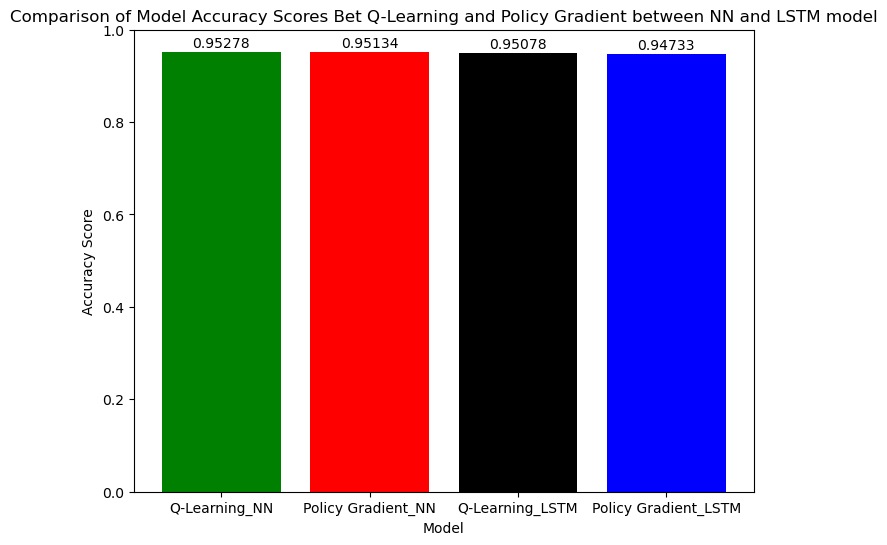

In [91]:
import matplotlib.pyplot as plt #importing matplotlib library

# accuracy scores
accuracy_scores = [accuracy_q, accuracy_pg, accuracy_q_lstm, accuracy_pg_lstm] #creates a list accuracy_scores that contains the accuracy values for four different models, Q-Learning, Policy Gradient, Q-Learning with LSTM, and Policy Gradient with LSTM.

# Model names
model_names = ['Q-Learning_NN', 'Policy Gradient_NN', 'Q-Learning_LSTM', 'Policy Gradient_LSTM'] #creates a list model_names that contains the accuracy values for four different models, Q-Learning, Policy Gradient, Q-Learning with LSTM, and Policy Gradient with LSTM.

colors = ['green', 'red' ,'Black', 'Blue'] # list of colors for each bar

# Set up the bar chart
fig, ax = plt.subplots(figsize=(8, 6)) #creates a new figure with a single subplot using plt.subplots() function and assigns it to the variables fig and ax. The figsize argument sets the size of the figure in inches to 8 inches in width and 6 inches in height.
# Add the bars to the plot
for i in range(len(model_names)): #creates a bar chart by looping through each index in model_names and plotting a bar on the ax subplot using the bar() function. 
    ax.bar(model_names[i], accuracy_scores[i], color=colors[i]) #The height of the bar is set to the corresponding value in accuracy_scores, and the color of the bar is set to the corresponding color in colors.

    # Add the accuracy score as text to the bar
    ax.text(model_names[i], accuracy_scores[i] + 0.01, round(accuracy_scores[i], 5), ha='center') #adds text labels to each bar in the chart by using the text() function of the ax subplot. The label text is the rounded value of the corresponding accuracy score from accuracy_scores. The ha parameter sets the horizontal alignment of the label to the center of the bar.

# Add labels and titles
ax.set_xlabel('Model') #sets the label of the x-axis of the chart to 'Model' using the set_xlabel() function of the ax subplot.
ax.set_ylabel('Accuracy Score') #sets the label of the y-axis of the chart to 'Accuracy Score' using the set_ylabel() function of the ax subplot.
ax.set_title('Comparison of Model Accuracy Scores Bet Q-Learning and Policy Gradient between NN and LSTM model') #sets the title of the chart to 'Comparison of Model Accuracy Scores Bet Q-Learning and Policy Gradient between NN and LSTM model' using the set_title() function of the ax subplot.
# Display the chart
plt.show() #displays the chart

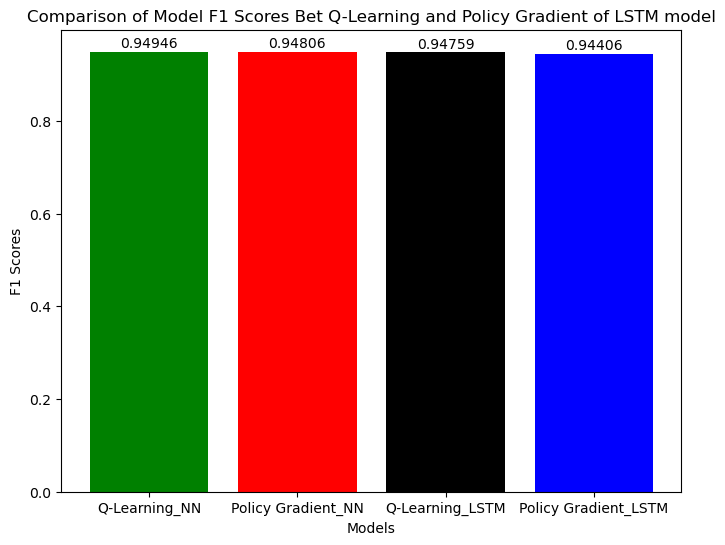

In [92]:
import matplotlib.pyplot as plt #This imports the matplotlib library and renames it as "plt" for easier reference in the code



# Model names
model_names = ['Q-Learning_NN', 'Policy Gradient_NN', 'Q-Learning_LSTM', 'Policy Gradient_LSTM'] #This defines a list of model names as strings.
f1_scores = [score_q, score_pg, score_q_lstm, score_pg_lstm] #This defines a list of F1 scores for each model. It assumes that the variables "score_q", "score_pg", "score_q_lstm", and "score_pg_lstm" have already been defined in the code.
colors = ['green', 'red' ,'Black', 'Blue']  # list of colors for each bar
# Set up the bar chart
fig, ax = plt.subplots(figsize=(8, 6)) #This creates a new figure and axes object for the plot with a specified size.
# Add the bars to the plot
for i in range(len(model_names)): #This for loop iterates through each model name and F1 score and adds a bar to the chart for each. The ax.text() function is used to add the F1 score as text to each bar.
    ax.bar(model_names[i], f1_scores[i], color=colors[i]) #This loop iterates over the model_names and f1_scores lists and adds a bar to the chart for each model. The color of each bar is determined by the corresponding color in the colors list. The loop also adds a text label to the top of each bar displaying the F1 score for that model.

    # Add the accuracy score as text to the bar
    ax.text(model_names[i], f1_scores[i] + 0.01, round(f1_scores[i], 5), ha='center') #this line of code adds a text label to the top of the corresponding bar. The text displays the F1 score for the corresponding model, and it is centered horizontally above the bar. By adding the text labels to the chart, the reader can more easily compare the F1 scores of the different models.

# add labels to the chart
plt.title('Comparison of Model F1 Scores Bet Q-Learning and Policy Gradient of LSTM model') #This line sets the title of the chart to 'Comparison of Model F1 Scores Bet Q-Learning and Policy Gradient of LSTM model'.
plt.xlabel('Models') #This line sets the label of the x-axis to 'Models'.
plt.ylabel('F1 Scores') #This line sets the label of the y-axis to 'F1 Scores'.
# display the chart
plt.show() #This line displays the chart. Once all the necessary data has been added to the chart, plt.show() is called to actually display the chart in a separate window or notebook output.